In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/Data AI4CKD.xlsx"
df = pd.read_excel(path)

df.head()

ID Sexe   Age Nationalité Profession (selon catégorie professionnelle)  \
0  1    F  50.0   Béninoise                                      Artisan   
1  2    M  28.0   Béninoise                                      Artisan   
2  3    F  69.0   Béninoise                                          NaN   
3  4    M  68.0   Béninoise                                 Entrepreneur   
4  5    F  68.0   Béninoise                                          NaN   

  Adresse (Département) Situation Matrimoniale  Motif(s) d'Admission/Asthénie  \
0              Littoral               Marié(e)                            1.0   
1                   Zou               Marié(e)                            1.0   
2            Atlantique               Marié(e)                            1.0   
3               Plateau               Marié(e)                            1.0   
4                   NaN               Marié(e)                            1.0   

   Motif(s) d'Admission/Altération de la fonction rénale  \
0                                                0.0       
1                                                1.0       
2                                                1.0       
3                                                0.0       
4                                                1.0       

   Motif(s) d'Admission/HTA  Motif(s) d'Admission/Œdème  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       1.0                         1.0   
4                       0.0                         0.0   

   Motif(s) d'Admission/Diabète  Motif(s) d'Admission/Douleur abdominale  \
0                           0.0                                      0.0   
1                           0.0                                      0.0   
2                           0.0                                      0.0   
3                           0.0                                      0.0   
4                           0.0                                      0.0   

  Autres Motifs d'Admission  Personnels Médicaux/HTA  \
0                       NaN                      1.0   
1                       NaN                      0.0   
2                       NaN                      1.0   
3                       NaN                      0.0   
4                       NaN                      1.0   

   Personnels Médicaux/Diabète 1  Personnels Médicaux/Diabète 2  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            1.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   Personnels Médicaux/IRC  \
0                      1.0   
1                      0.0   
2                      1.0   
3                      0.0   
4                      1.0   

   Personnels Médicaux/Maladies Cardiovasculaire(Cardiopathie, AVC, preeclampsie)  \
0                                                0.0                                
1                                                0.0                                
2                                                0.0                                
3                                                0.0                                
4                                                0.0                                

   Personnels Médicaux/Ulcère  \
0                         0.0   
1                         0.0   
2                         0.0   
3                         0.0   
4                         0.0   

   Personnels Médicaux/Pathologies virales (HB, HC, HIV)  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3             

In [ ]:
cols_to_drop = ["ID"]

# Colonnes post-diagnostic à exclure
cols_causes = [
    col for col in df.columns
    if col.startswith("Causes Majeure après Diagnostic/")
]

cols_to_drop.extend(cols_causes)


In [ ]:
# Colonnes exclues
cols_to_drop = ["ID"]

cols_causes = [
    col for col in df.columns
    if col.startswith("Causes Majeure après Diagnostic/")
]

cols_to_drop.extend(cols_causes)

# Affichage
print("Variables exclues du dataset :\n")
for col in cols_to_drop:
    print("-", col)


Variables exclues du dataset :

- ID
- Causes Majeure après Diagnostic/HTA
- Causes Majeure après Diagnostic/Diabète


In [ ]:
df_final = df.drop(columns=cols_to_drop)


In [ ]:
df_final['Stage de l\'IRC'].unique()


array(['CKD 5', 'CKD 2', 'CKD 4', 'CKD 3a', 'CKD 1', 'CKD 3b', nan, 0],
      dtype=object)

In [ ]:
import pandas as pd

# Pourcentage de cellules non nulles par colonne
non_null_percentage = df_final.notnull().sum() / len(df_final) * 100

# Afficher les 10 premières colonnes pour vérifier
print(non_null_percentage.head)

<bound method NDFrame.head of Sexe                                            96.763754
Age                                             97.087379
Nationalité                                     98.381877
Profession (selon catégorie professionnelle)    86.731392
Adresse (Département)                           81.553398
                                                  ...    
Autres Pathologies                               3.559871
Rythme Cardiaque/Sinusal                        99.352751
Rythme Cardiaque/Régulier                       76.375405
Trouble de la Repolarisation                    79.611650
Stage de l'IRC                                  99.352751
Length: 198, dtype: float64>


In [ ]:
non_null_percentage[non_null_percentage > 29]

Sexe                                            96.763754
Age                                             97.087379
Nationalité                                     98.381877
Profession (selon catégorie professionnelle)    86.731392
Adresse (Département)                           81.553398
                                                  ...    
Pathologies/Glaucome                            99.352751
Rythme Cardiaque/Sinusal                        99.352751
Rythme Cardiaque/Régulier                       76.375405
Trouble de la Repolarisation                    79.611650
Stage de l'IRC                                  99.352751
Length: 162, dtype: float64

In [ ]:
import pandas as pd

# Calcul du pourcentage de cellules non nulles par colonne
non_null_percentage = df_final.notnull().sum() / len(df_final) * 100

# Sélection des colonnes avec plus de 50% de données présentes
selected_columns = non_null_percentage[non_null_percentage > 29].index

# Création d'un nouveau DataFrame avec ces colonnes
df_filtered = df_final[selected_columns]

# Colonnes à supprimer
columns_to_drop = [
    "Causes Majeure après Diagnostic/HTA",
    "Causes Majeure après Diagnostic/Diabète ID",
    "Nationalité"
]

# Suppression des colonnes si elles existent dans df_filtered
df_filtered = df_filtered.drop(columns=[col for col in columns_to_drop if col in df_filtered.columns])

In [ ]:
import pandas as pd

# Détecter automatiquement les colonnes numériques et catégorielles
numeric_cols = df_filtered.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_filtered.select_dtypes(include=['object', 'category']).columns.tolist()

# Imputation pour les colonnes numériques (médiane)
for col in numeric_cols:
    df_filtered[col].fillna(df_filtered[col].median(), inplace=True)

# Imputation pour les colonnes catégorielles (mode)
for col in categorical_cols:
    df_filtered[col].fillna(df_filtered[col].mode()[0], inplace=True)

# Vérification des valeurs manquantes restantes
df_filtered.isnull().sum()


/tmp/ipython-input-9885718.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered[col].fillna(df_filtered[col].median(), inplace=True)
/tmp/ipython-input-9885718.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

Sexe                                            0
Age                                             0
Profession (selon catégorie professionnelle)    0
Adresse (Département)                           0
Situation Matrimoniale                          0
                                               ..
Pathologies/Glaucome                            0
Rythme Cardiaque/Sinusal                        0
Rythme Cardiaque/Régulier                       0
Trouble de la Repolarisation                    0
Stage de l'IRC                                  0
Length: 161, dtype: int64

In [ ]:
df_filtered.head(5)

Sexe   Age Profession (selon catégorie professionnelle)  \
0    F  50.0                                      Artisan   
1    M  28.0                                      Artisan   
2    F  69.0                                Retriaité(e)    
3    M  68.0                                 Entrepreneur   
4    F  68.0                                Retriaité(e)    

  Adresse (Département) Situation Matrimoniale  Motif(s) d'Admission/Asthénie  \
0              Littoral               Marié(e)                            1.0   
1                   Zou               Marié(e)                            1.0   
2            Atlantique               Marié(e)                            1.0   
3               Plateau               Marié(e)                            1.0   
4              Littoral               Marié(e)                            1.0   

   Motif(s) d'Admission/Altération de la fonction rénale  \
0                                                0.0       
1                                                1.0       
2                                                1.0       
3                                                0.0       
4                                                1.0       

   Motif(s) d'Admission/HTA  Motif(s) d'Admission/Œdème  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       1.0                         1.0   
4                       0.0                         0.0   

   Motif(s) d'Admission/Diabète  Motif(s) d'Admission/Douleur abdominale  \
0                           0.0                                      0.0   
1                           0.0                                      0.0   
2                           0.0                                      0.0   
3                           0.0                                      0.0   
4                           0.0                                      0.0   

   Personnels Médicaux/HTA  Personnels Médicaux/Diabète 1  \
0                      1.0                            0.0   
1                      0.0                            0.0   
2                      1.0                            0.0   
3                      0.0                            0.0   
4                      1.0                            0.0   

   Personnels Médicaux/Diabète 2  Personnels Médicaux/IRC  \
0                            0.0                      1.0   
1                            0.0                      0.0   
2                            1.0                      1.0   
3                            0.0                      0.0   
4                            0.0                      1.0   

   Personnels Médicaux/Maladies Cardiovasculaire(Cardiopathie, AVC, preeclampsie)  \
0                                                0.0                                
1                                                0.0                                
2                                                0.0                                
3                                                0.0                                
4                                                0.0                                

   Personnels Médicaux/Ulcère  \
0                         0.0   
1                         0.0   
2                         0.0   
3                         0.0   
4                         0.0   

   Personnels Médicaux/Pathologies virales (HB, HC, HIV) Durée HTA (mois)  \
0                                                0.0                >=120   
1                                                0.0                >=120   
2                                                0.0                >=120   
3                                                0.0                >=120   
4                                                0.0                >=120   

   Personnels Chirurgicaux/Appendicectomie  \
0                     


=== Analyse Univariée : Variables Numériques ===

Colonne : Age
count    309.000000
mean      54.576126
std       15.124695
min        0.022876
25%       44.000000
50%       57.000000
75%       66.000000
max       88.000000
Name: Age, dtype: float64



Colonne : Température (C°)
count    309.000000
mean      36.515098
std        3.520897
min        0.000000
25%       36.900000
50%       36.900000
75%       36.900000
max       39.000000
Name: Température (C°), dtype: float64


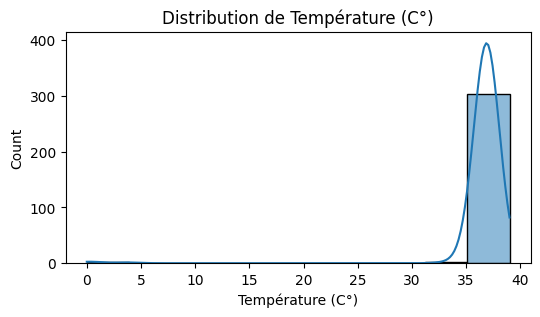


Colonne : TA (mmHg)/Systole
count    309.000000
mean     137.966665
std       32.879474
min        0.199346
25%      126.000000
50%      138.500000
75%      150.000000
max      225.000000
Name: TA (mmHg)/Systole, dtype: float64



Colonne : TA (mmHg)/Diastole
count    309.000000
mean      81.838833
std       21.290303
min        0.199346
25%       75.000000
50%       82.000000
75%       91.000000
max      135.000000
Name: TA (mmHg)/Diastole, dtype: float64


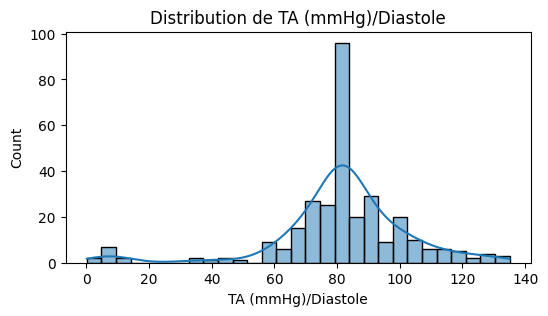


Colonne : Poul (bpm)
count    309.000000
mean      81.693286
std       18.147395
min        0.000000
25%       76.000000
50%       83.000000
75%       90.000000
max      134.000000
Name: Poul (bpm), dtype: float64


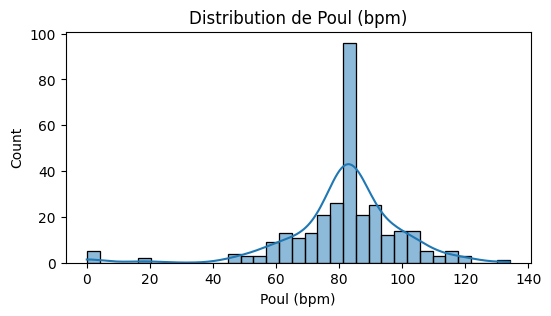


Colonne : Poids (Kg)
count    309.000000
mean      73.949553
std       14.365853
min        0.411765
25%       70.000000
50%       73.000000
75%       78.000000
max      125.000000
Name: Poids (Kg), dtype: float64



Colonne : Taille (m)
count    309.000000
mean       2.147343
std        8.895331
min        0.549020
25%        1.640000
50%        1.640000
75%        1.640000
max      158.000000
Name: Taille (m), dtype: float64


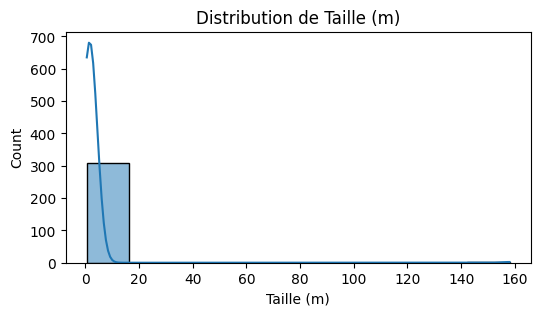


Colonne : Score de Glasgow (/15)
count    309.000000
mean      14.864406
std        1.046469
min        0.101307
25%       15.000000
50%       15.000000
75%       15.000000
max       15.000000
Name: Score de Glasgow (/15), dtype: float64


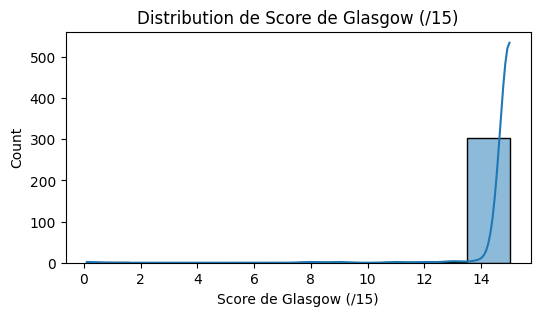


Colonne : Glycémie à jeun (taux de Glucose)
count    309.000000
mean       1.137124
std        1.035831
min        0.221374
25%        0.920000
50%        0.980000
75%        1.100000
max       18.000000
Name: Glycémie à jeun (taux de Glucose), dtype: float64


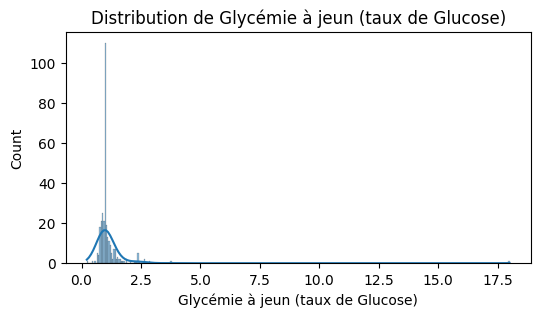


Colonne : Urée (g/L)
count    309.000000
mean       1.397375
std       10.838807
min        0.060000
25%        0.280000
50%        0.450000
75%        0.790000
max      189.000000
Name: Urée (g/L), dtype: float64


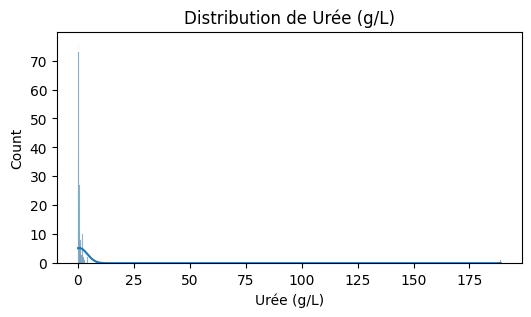


Colonne : Créatinine (mg/L)
count    309.000000
mean      43.222184
std       69.341664
min        0.000000
25%       12.000000
50%       17.360000
75%       31.000000
max      500.000000
Name: Créatinine (mg/L), dtype: float64


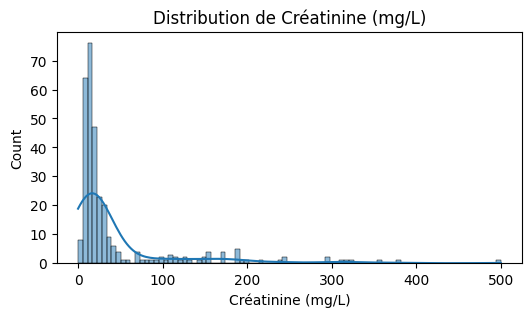


Colonne : Na^+ (meq/L)
count    309.000000
mean     137.680591
std       10.620859
min        0.102639
25%      137.000000
50%      139.000000
75%      141.000000
max      148.000000
Name: Na^+ (meq/L), dtype: float64


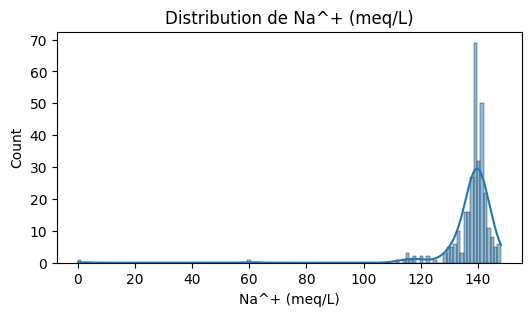


Colonne : K^+ (meq/L)
count    309.000000
mean       4.496988
std        3.612943
min        0.089286
25%        3.800000
50%        4.100000
75%        4.400000
max       43.000000
Name: K^+ (meq/L), dtype: float64


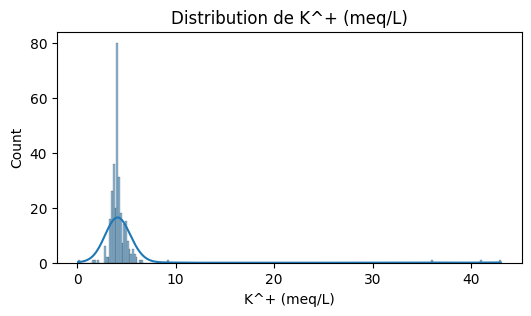


Colonne : Ca^2+ (meq/L)
count    309.000000
mean      90.855240
std       11.329358
min        0.229219
25%       88.000000
50%       92.000000
75%       96.000000
max      120.000000
Name: Ca^2+ (meq/L), dtype: float64



Colonne : Cl^- (meq/L)
count    309.000000
mean     101.285010
std        9.156547
min        0.138028
25%      100.000000
50%      102.000000
75%      105.000000
max      119.000000
Name: Cl^- (meq/L), dtype: float64


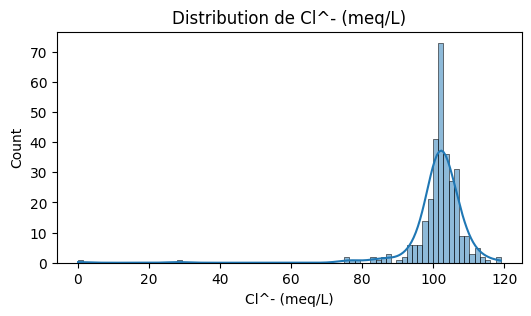


Colonne : P (meq/L)
count    309.000000
mean      40.250437
std       12.673159
min        0.365145
25%       38.000000
50%       38.000000
75%       38.000000
max      106.000000
Name: P (meq/L), dtype: float64


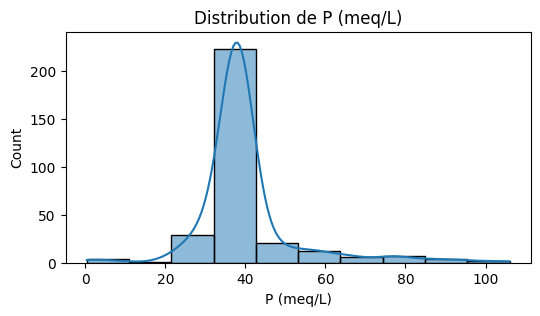


Colonne : Hb (g/dL)
count    309.000000
mean      11.951943
std       10.717824
min        0.140449
25%        9.400000
50%       10.900000
75%       12.500000
max      118.000000
Name: Hb (g/dL), dtype: float64


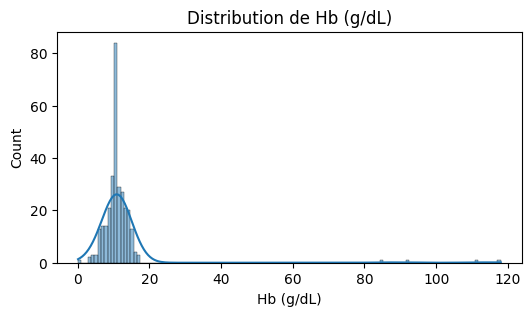


Colonne : Hte (%)
count    309.000000
mean      29.948277
std       23.845870
min        0.397638
25%       28.700000
50%       28.700000
75%       28.700000
max      437.000000
Name: Hte (%), dtype: float64


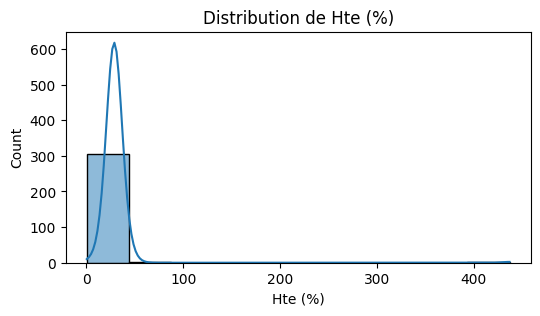


Colonne : VGM (fL)
count    309.000000
mean      81.398143
std        8.065199
min        0.306122
25%       80.900000
50%       82.000000
75%       82.600000
max      101.000000
Name: VGM (fL), dtype: float64


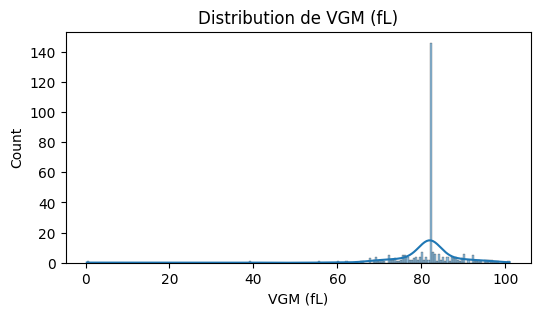


Colonne : TCMH (pg)
count    309.000000
mean      27.125175
std        3.611700
min        0.389222
25%       27.000000
50%       27.000000
75%       27.000000
max       76.200000
Name: TCMH (pg), dtype: float64


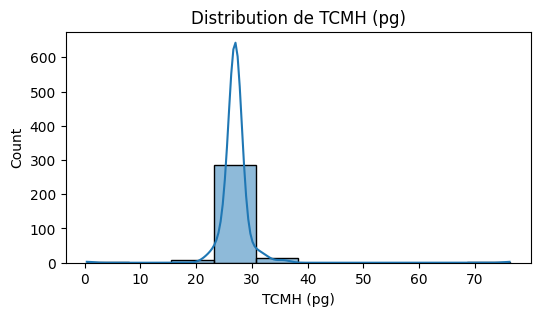


Colonne : CCMH (%)
count    309.000000
mean      32.679261
std        2.242442
min        0.351695
25%       32.800000
50%       32.800000
75%       32.800000
max       37.000000
Name: CCMH (%), dtype: float64


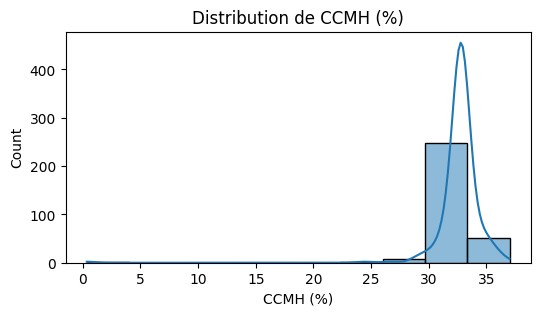


Colonne : NB (G/L)
count     309.000000
mean       21.050068
std       238.679470
min         0.294931
25%         5.800000
50%         6.100000
75%         6.700000
max      4200.000000
Name: NB (G/L), dtype: float64


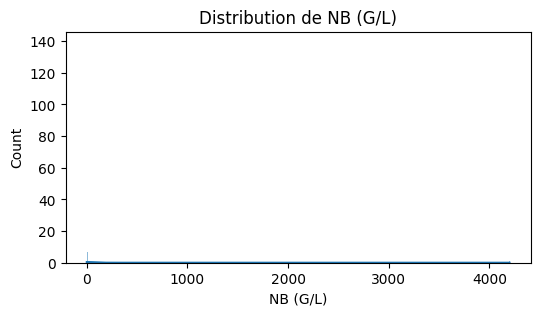


Colonne : PN (G/L)
count     309.000000
mean       36.213743
std       366.122094
min         0.322000
25%         4.360000
50%         4.360000
75%         4.360000
max      5041.000000
Name: PN (G/L), dtype: float64


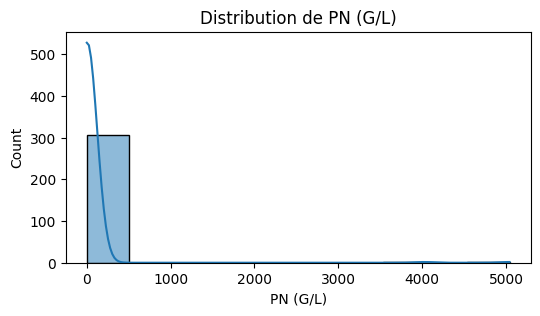


Colonne : Ly (G/L)
count     309.000000
mean       14.675070
std       149.866023
min         0.273000
25%         1.664000
50%         1.664000
75%         1.664000
max      1888.000000
Name: Ly (G/L), dtype: float64


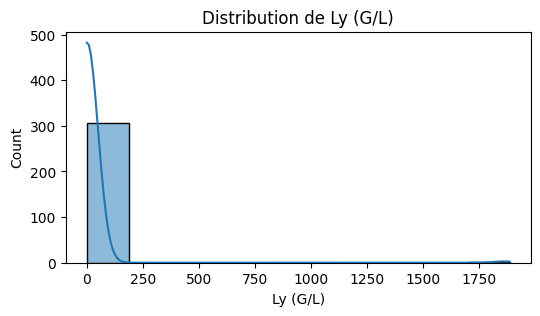


Colonne : Plaquettes (g/L)
count    309.000000
mean     247.577975
std       88.513933
min        0.264423
25%      215.000000
50%      240.000000
75%      268.000000
max      748.000000
Name: Plaquettes (g/L), dtype: float64


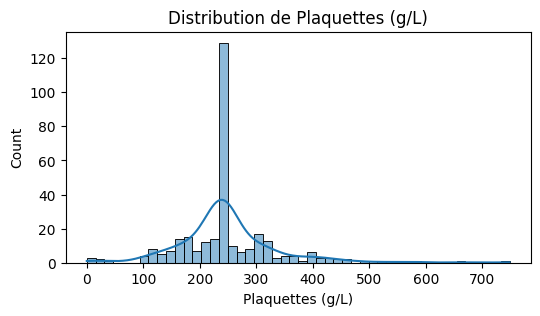


=== Analyse Univariée : Variables Catégorielles ===

Colonne : Sexe
Sexe
M           160
F           148
0.026144      1
Name: count, dtype: int64


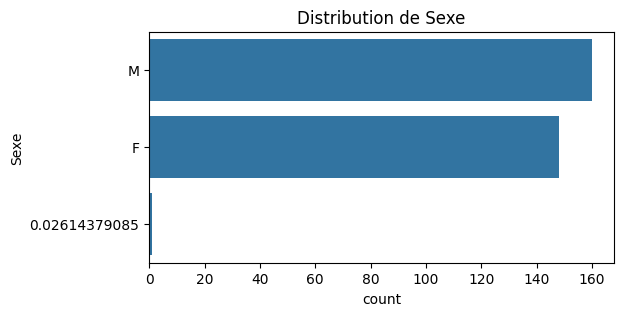


Colonne : Profession (selon catégorie professionnelle)
Profession (selon catégorie professionnelle)
Retriaité(e)           99
Salarié(e)             54
Agent commercial       51
Artisan                48
Personnel sanitaire    31
Entrepreneur           17
Ecolier/Etudiant        5
Religieux               3
0.127451                1
Name: count, dtype: int64


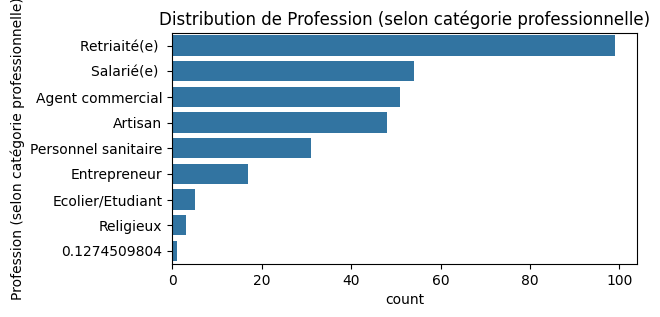


Colonne : Adresse (Département)
Adresse (Département)
Littoral      159
Atlantique     85
Ouémé          39
Zou             8
Mono            8
Plateau         3
Couffo          3
Collines        2
Alibori         1
0.179739        1
Name: count, dtype: int64


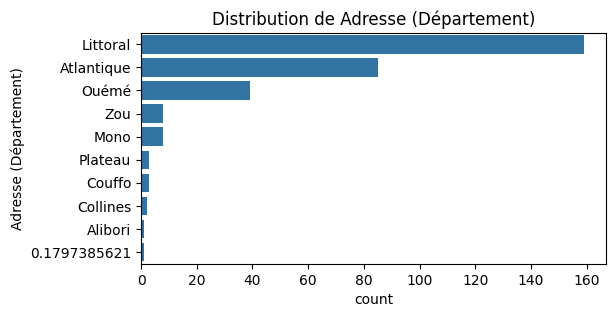


Colonne : Situation Matrimoniale
Situation Matrimoniale
Marié(e)       291
Célibataire     16
Veuf(ve)         1
0.379085         1
Name: count, dtype: int64


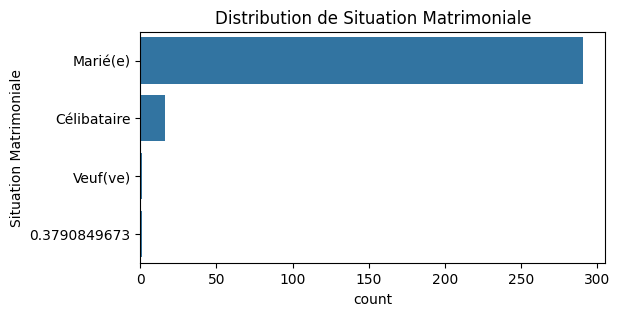


Colonne : Durée HTA (mois)
Durée HTA (mois)
>=120       199
[12;60[      56
[60;120[     38
[6;12[        8
<6            7
0.352941      1
Name: count, dtype: int64


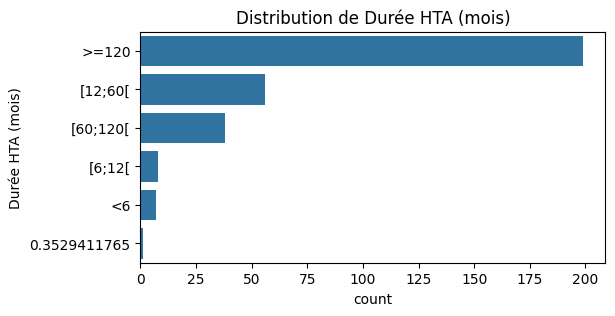


Colonne : Début des symptômes (mois)
Début des symptômes (mois)
<=1         235
>3           56
]1;3]        17
0.424837      1
Name: count, dtype: int64



Colonne : Symptômes/OMI
Symptômes/OMI
Non    196
Oui    112
0        1
Name: count, dtype: int64


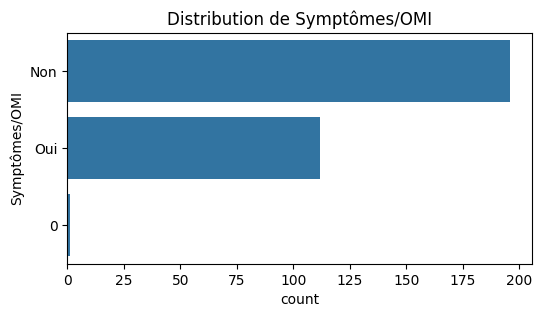


Colonne : Automédication ?
Automédication ?
Non    279
Oui     24
RAS      5
0        1
Name: count, dtype: int64


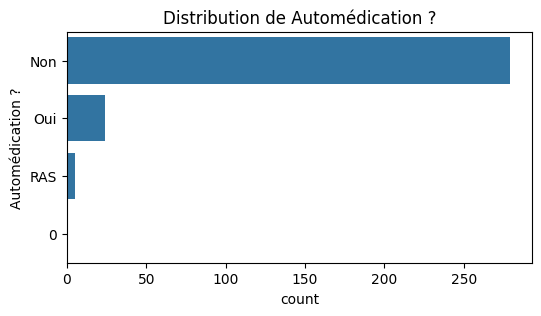


Colonne : Etat Général (EG) à l'Admission
Etat Général (EG) à l'Admission
Bon          142
Aceptable    120
Altéré        46
0.01634        1
Name: count, dtype: int64


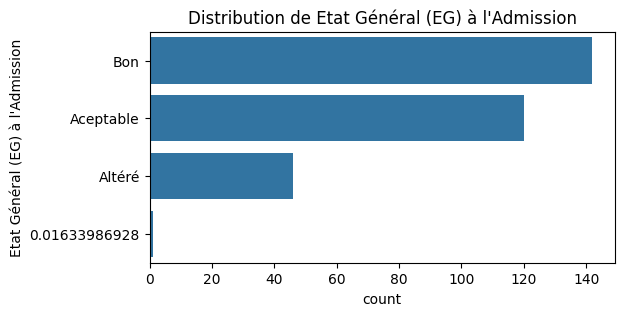


Colonne : Etat Général (EG)/Muqueuse Bulbaire
Etat Général (EG)/Muqueuse Bulbaire
Anictérique    181
Ictérique      127
0                1
Name: count, dtype: int64


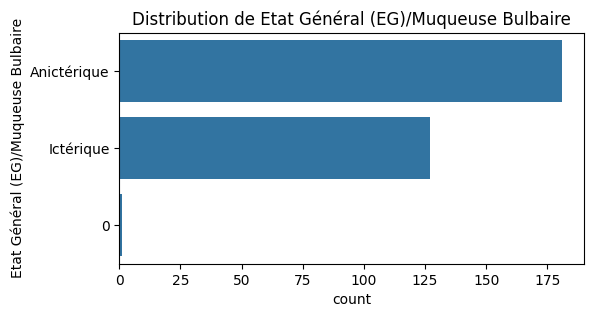


Colonne : Etat Général (EG)/Muqueuse Palpébrale
Etat Général (EG)/Muqueuse Palpébrale
Bien colorée           154
Moyennement colorée    113
Pâle                    41
0                        1
Name: count, dtype: int64


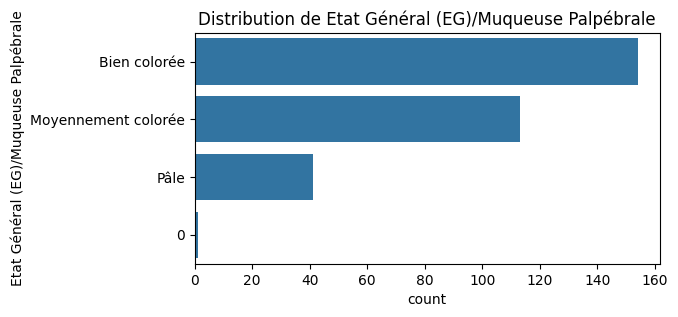


Colonne : Sueur
Sueur
Non    303
Oui      5
0        1
Name: count, dtype: int64


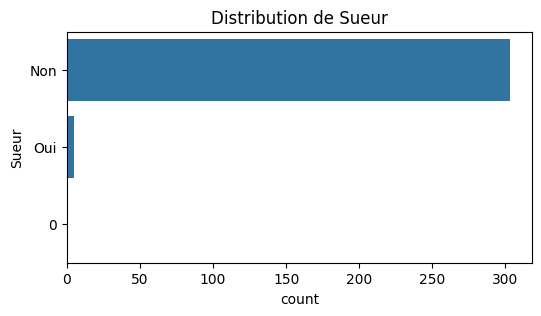


Colonne : IMC
IMC
Normal            225
Obese              39
Overweight         33
Extremly Obese      7
Underweight         4
0.552288            1
Name: count, dtype: int64



Colonne : Diurèse
Diurèse
Non quantifiée    182
Préservée          73
Oligurie           49
Anurie              4
0                   1
Name: count, dtype: int64



Colonne : Vibrations Vocales (VV)
Vibrations Vocales (VV)
Bien transmises    301
Diminuées            6
Exagérées            1
0.026144             1
Name: count, dtype: int64


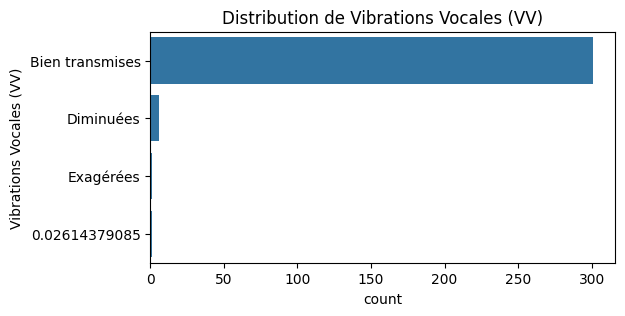


Colonne : Amplification Thoracique
Amplification Thoracique
Bonne       301
Mauvaise      7
0.022876      1
Name: count, dtype: int64



Colonne : Sonorité Pulmonaire
Sonorité Pulmonaire
Bonne       299
Matité        9
0.042484      1
Name: count, dtype: int64


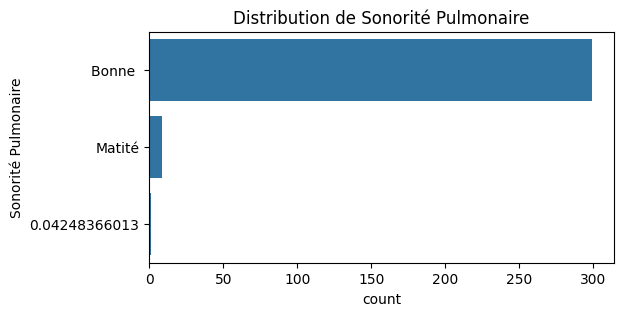


Colonne : Murmure Vésiculaire
Murmure Vésiculaire
Bien perçu    296
Aboli          12
0.022876        1
Name: count, dtype: int64


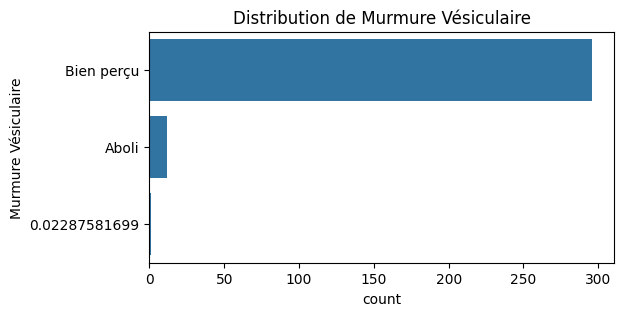


Colonne : B1 et B2/Réguliers
B1 et B2/Réguliers
Oui         298
Non          10
0.039216      1
Name: count, dtype: int64


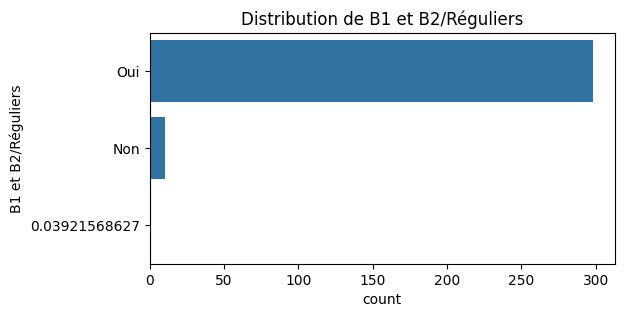


Colonne : B1 et B2/Perçu sans souffle
B1 et B2/Perçu sans souffle
Oui         305
Non           3
0.062092      1
Name: count, dtype: int64


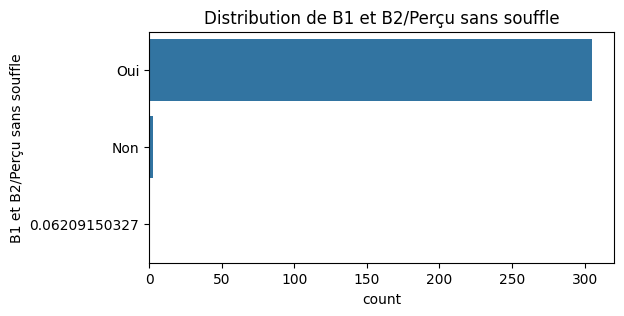


Colonne : Choc de Pointe/Perçu
Choc de Pointe/Perçu
Oui         273
Non          35
0.137255      1
Name: count, dtype: int64


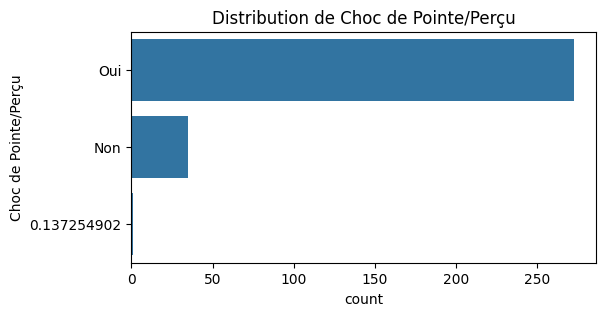


Colonne : Choc de Pointe/Palpé
Choc de Pointe/Palpé
Oui         294
Non          14
0.689542      1
Name: count, dtype: int64


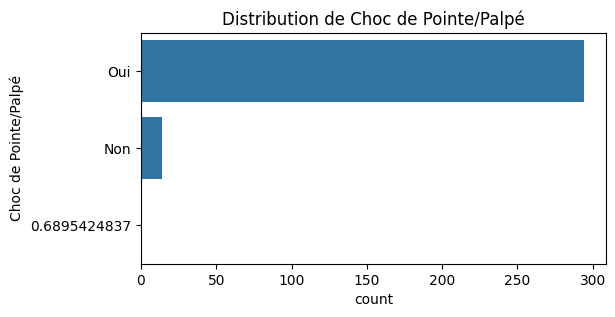


Colonne : Pouls Périphériques/Régulier
Pouls Périphériques/Régulier
Oui         303
Non           5
0.153595      1
Name: count, dtype: int64


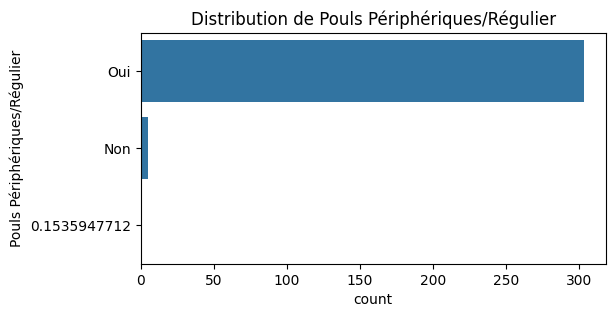


Colonne : Présence de bruits surajoutés
Présence de bruits surajoutés
Non    303
Oui      5
0        1
Name: count, dtype: int64



Colonne : TSJ (Signe de Hazer)
TSJ (Signe de Hazer)
Non    300
Oui      8
0        1
Name: count, dtype: int64



Colonne : RHJ
RHJ
Non    305
Oui      3
0        1
Name: count, dtype: int64



Colonne : Mollets souples
Mollets souples
Non    288
Oui     20
0        1
Name: count, dtype: int64


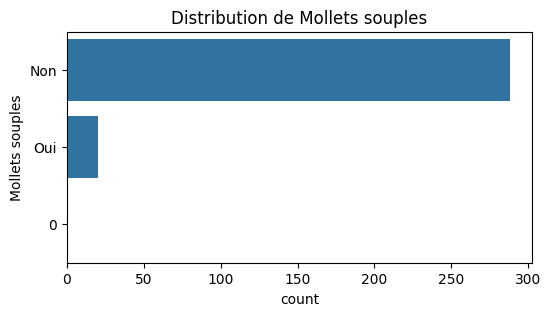


Colonne : OMI/Siégeant au niveau des pieds
OMI/Siégeant au niveau des pieds
Non    295
Oui     13
0        1
Name: count, dtype: int64


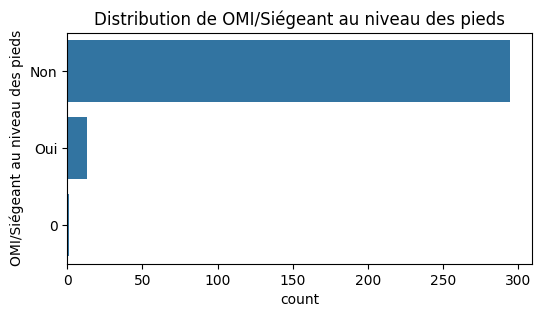


Colonne : OMI/Bilatéral
OMI/Bilatéral
Non    202
Oui    106
0        1
Name: count, dtype: int64


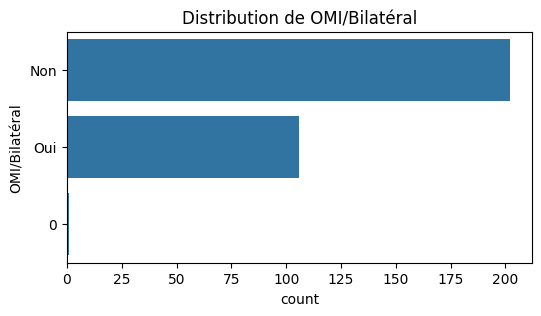


Colonne : OMI/Indolores
OMI/Indolores
Non    202
Oui    106
0        1
Name: count, dtype: int64


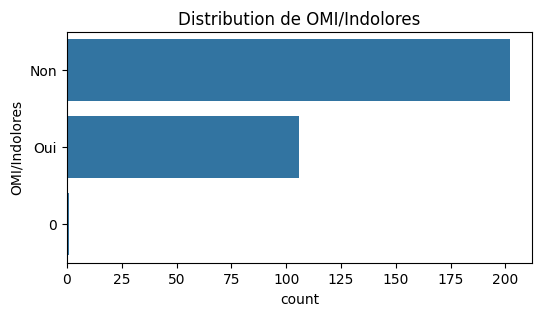


Colonne : OMI/Mous
OMI/Mous
Non    285
Oui     23
0        1
Name: count, dtype: int64


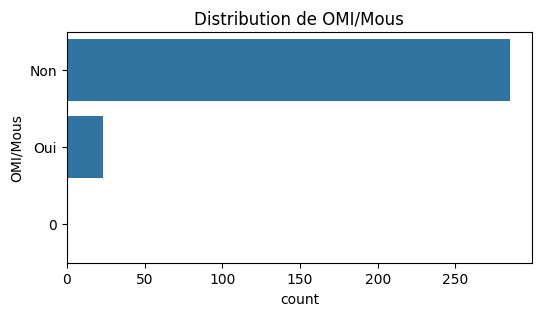


Colonne : OMI/Douloureux
OMI/Douloureux
Non    306
Oui      2
0        1
Name: count, dtype: int64


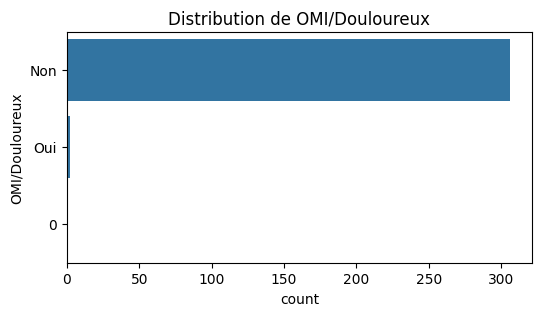


Colonne : Hygiène buccodentaire
Hygiène buccodentaire
Acceptable          204
Bonne               102
Salive hématique      1
Urémique              1
0.039216              1
Name: count, dtype: int64


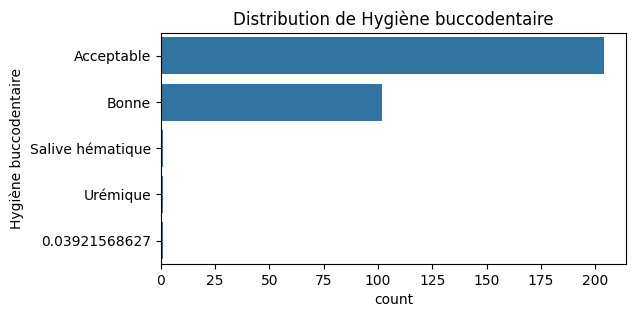


Colonne : Langue
Langue
Propre                  305
Chargée ou saburrale      2
Sèche                     1
0.058824                  1
Name: count, dtype: int64


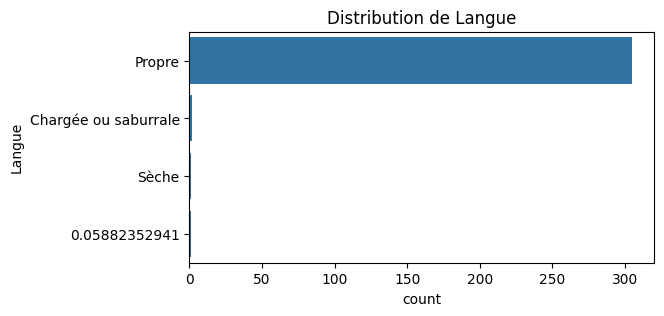


Colonne : Abdomen/Souple
Abdomen/Souple
Oui        305
Non          3
0.04902      1
Name: count, dtype: int64


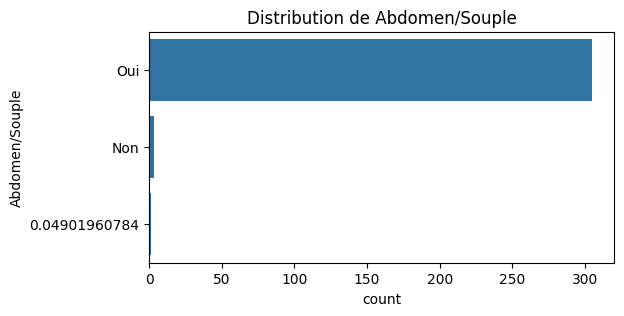


Colonne : Abdomen/Balloné (et infiltré)
Abdomen/Balloné (et infiltré)
Non    288
Oui     20
0        1
Name: count, dtype: int64


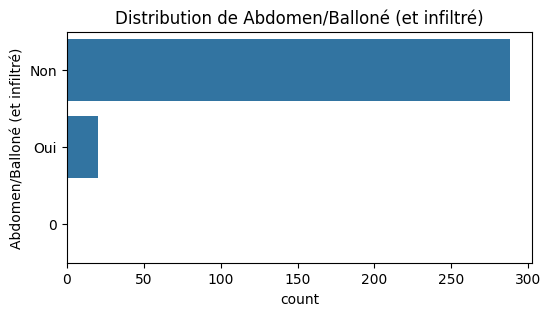


Colonne : Abdomen/Douloureux
Abdomen/Douloureux
Non        277
Oui         31
0.03268      1
Name: count, dtype: int64


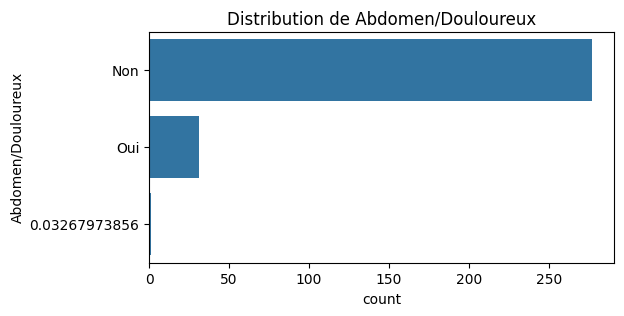


Colonne : Douleur Epigastrique
Douleur Epigastrique
Non    295
Oui     13
0        1
Name: count, dtype: int64


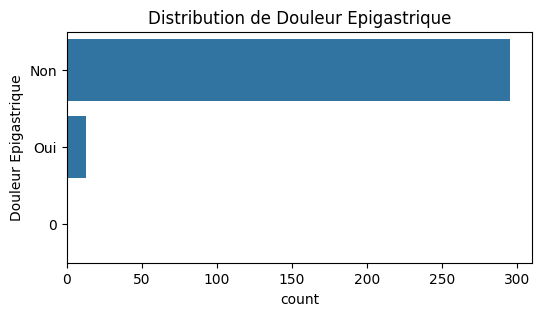


Colonne : Douleur Hypogastrique
Douleur Hypogastrique
Non    303
Oui      5
0        1
Name: count, dtype: int64


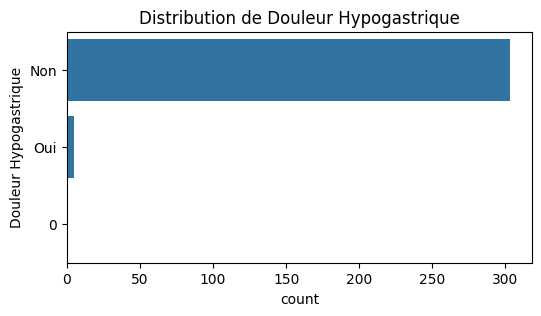


Colonne : Douleur à l'hypochondre
Douleur à l'hypochondre
Non    301
Oui      7
0        1
Name: count, dtype: int64


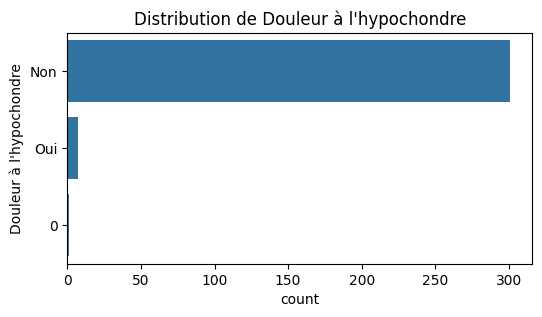


Colonne : Abdomen/Participe bien à la respiration
Abdomen/Participe bien à la respiration
Oui         199
Non         109
0.003268      1
Name: count, dtype: int64


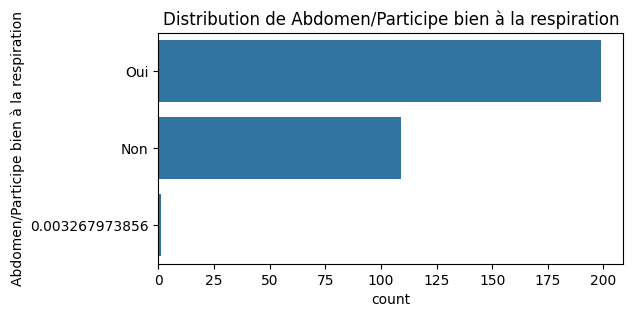


Colonne : Matité des flancs
Matité des flancs
Non    305
Oui      3
0        1
Name: count, dtype: int64


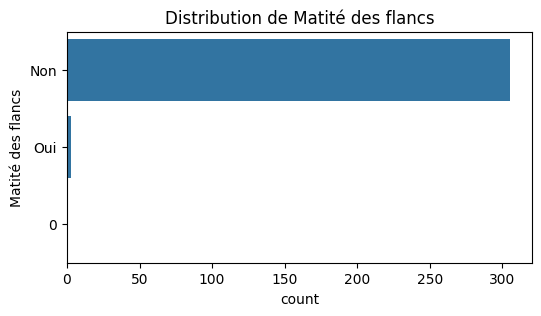


Colonne : Hépatomégalie (augmentation du foi)
Hépatomégalie (augmentation du foi)
Non    305
Oui      3
0        1
Name: count, dtype: int64


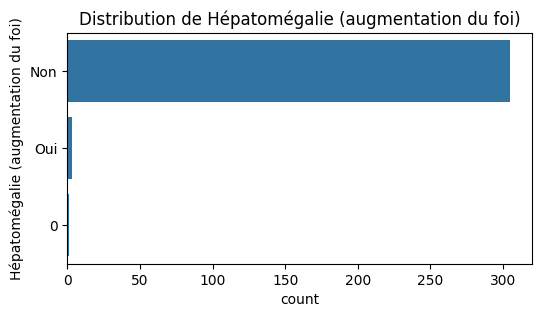


Colonne : Points Urétéraux douloureux
Points Urétéraux douloureux
Non         307
Oui           1
0.003268      1
Name: count, dtype: int64


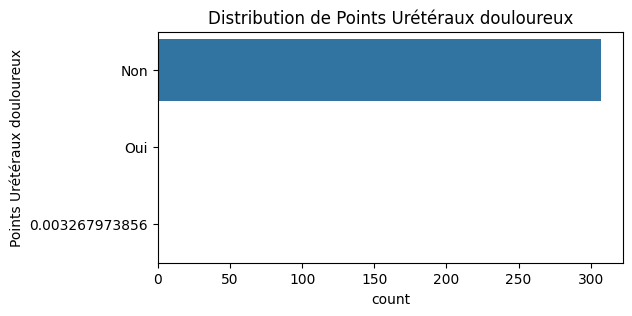


Colonne : Contact Lombaire
Contact Lombaire
Non         308
0.006536      1
Name: count, dtype: int64


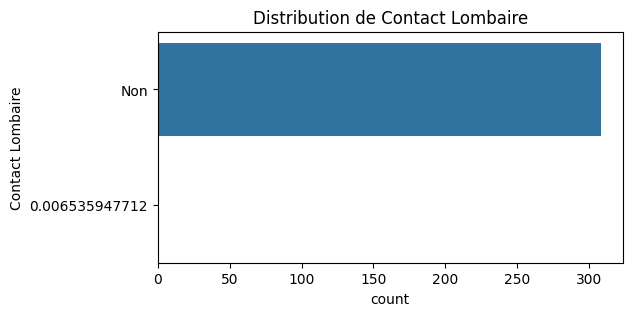


Colonne : Fosse Lombaire/Symétrique
Fosse Lombaire/Symétrique
Oui    304
Non      4
0        1
Name: count, dtype: int64


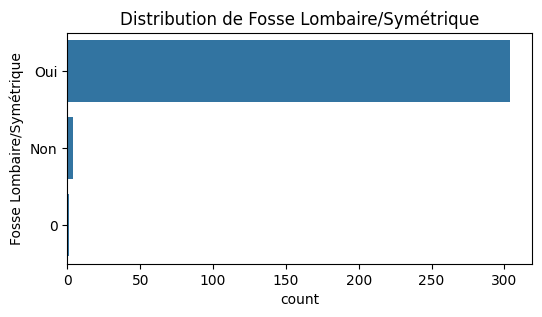


Colonne : Fosse Lombaire/Douloureux
Fosse Lombaire/Douloureux
Non    286
Oui     22
0        1
Name: count, dtype: int64


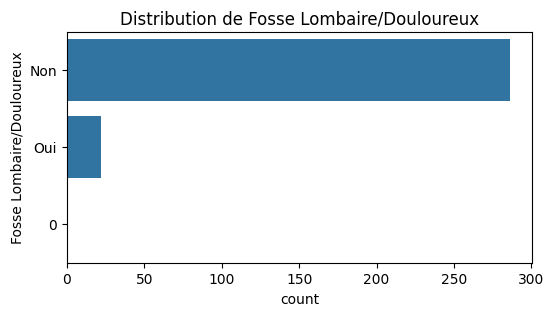


Colonne : Présence de Masse Lombaire
Présence de Masse Lombaire
Non    307
Oui      1
0        1
Name: count, dtype: int64


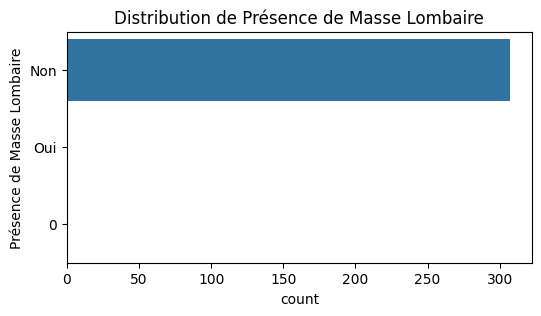


Colonne : Signe de Giordano
Signe de Giordano
Absent     297
Présent     11
0            1
Name: count, dtype: int64


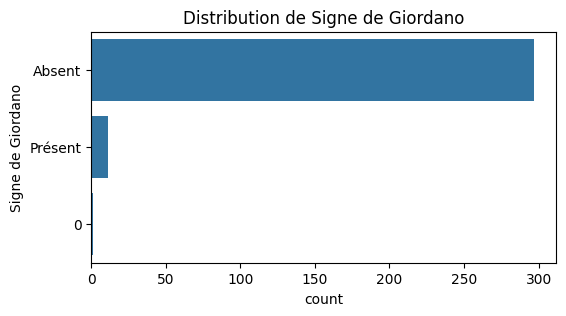


Colonne : Miction (Incontinence Urinaire)/Vue
Miction (Incontinence Urinaire)/Vue
Non         307
Oui           1
0.013072      1
Name: count, dtype: int64


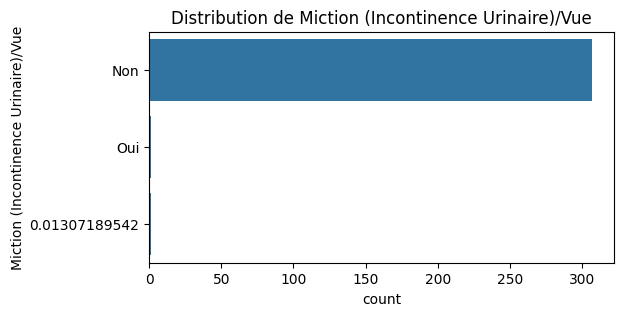


Colonne : Miction (Incontinence Urinaire)/Confortable
Miction (Incontinence Urinaire)/Confortable
Oui         306
Non           2
0.009804      1
Name: count, dtype: int64


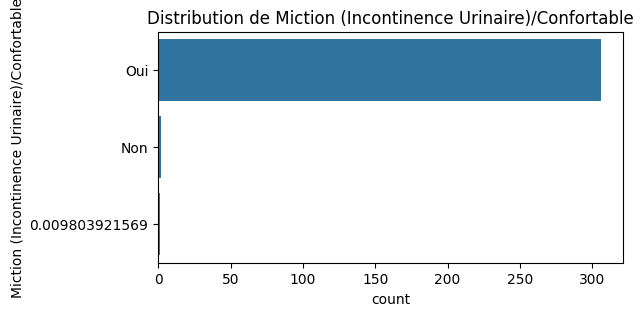


Colonne : Miction (Incontinence Urinaire)/Normale
Miction (Incontinence Urinaire)/Normale
Non         299
Oui           9
0.009804      1
Name: count, dtype: int64


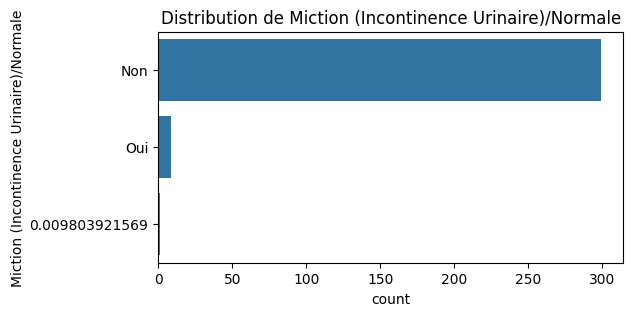


Colonne : Brûlures mictionnelles
Brûlures mictionnelles
Non    306
Oui      2
0        1
Name: count, dtype: int64


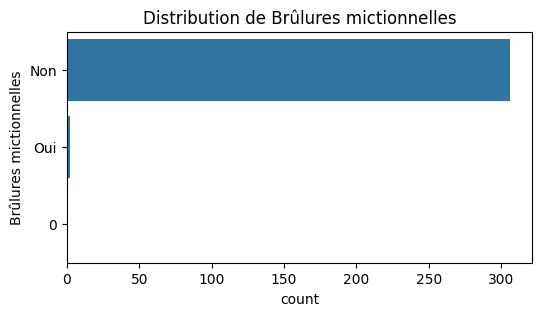


Colonne : Globe vésical
Globe vésical
Non    307
Oui      1
0        1
Name: count, dtype: int64


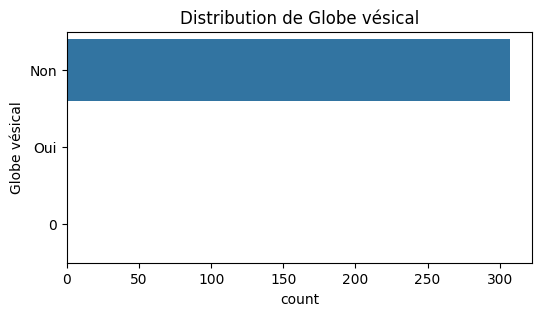


Colonne : Douleur pelvienne
Douleur pelvienne
Non    305
Oui      3
0        1
Name: count, dtype: int64


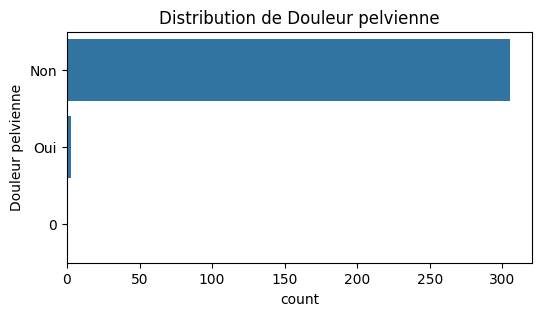


Colonne : Vessie de Lutte
Vessie de Lutte
Non    306
Oui      2
0        1
Name: count, dtype: int64


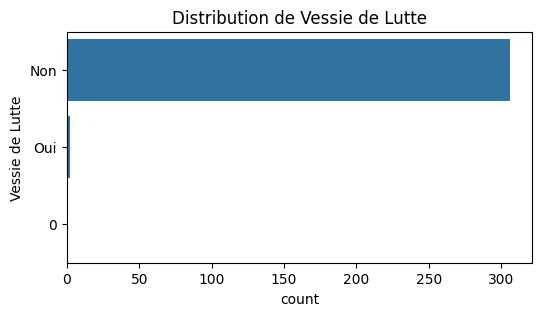


Colonne : Ballotement Rénal
Ballotement Rénal
Non         308
0.003268      1
Name: count, dtype: int64


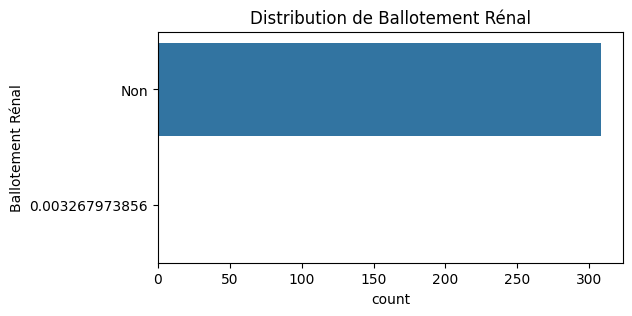


Colonne : Conscience
Conscience
Claire                                299
Altérée                                 4
Obnubilée                               2
Perte                                   1
Pupilles isochores normo-réactives      1
                                        1
0.035948                                1
Name: count, dtype: int64


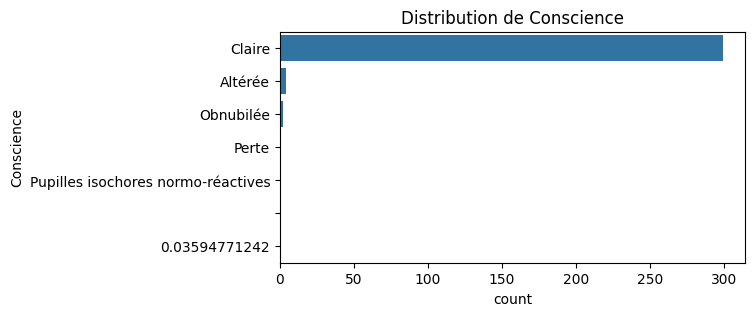


Colonne : Motricité
Motricité
Conservée                                                                            298
Hémiparésie droite                                                                     3
Parésie                                                                                2
Conservée au niveau des membres supérieurs, Déficit moteur des membres inférieurs      1
Paralysie faciale périphérique gauche                                                  1
Tremblement de repos                                                                   1
Paralysie                                                                              1
Diminution de la force musculaire dans les membres thoracique et pelviens              1
0.039216                                                                               1
Name: count, dtype: int64


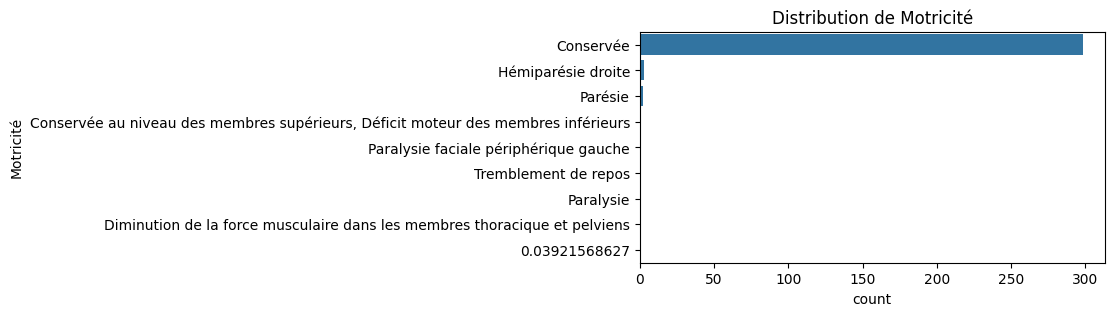


Colonne : Sensibilité
Sensibilité
Conservée    307
Perte          1
0.035948       1
Name: count, dtype: int64


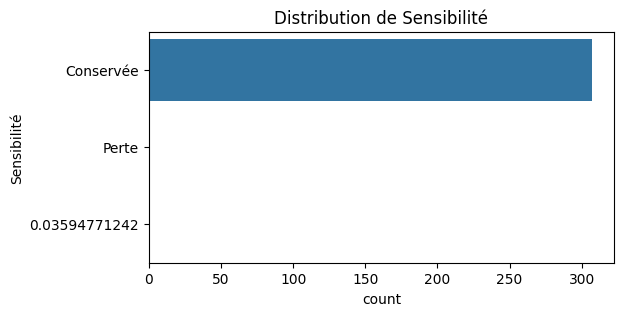


Colonne : Convulsions
Convulsions
Non         299
Oui           9
0.003268      1
Name: count, dtype: int64


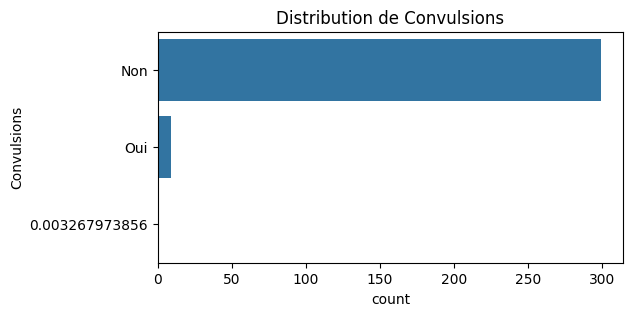


Colonne : Anémie
Anémie
Non         205
Oui         103
0.238562      1
Name: count, dtype: int64


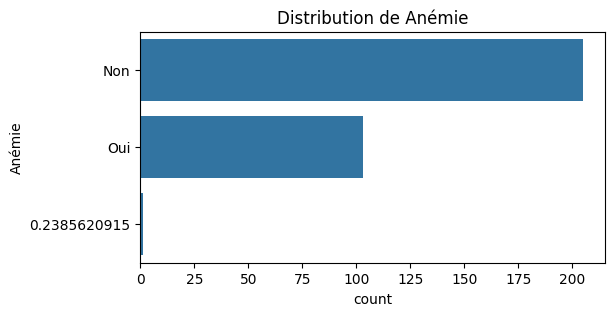


Colonne : Cholestérol Total
Cholestérol Total
Normal      254
Augmenté     45
Réduit        9
0.457516      1
Name: count, dtype: int64


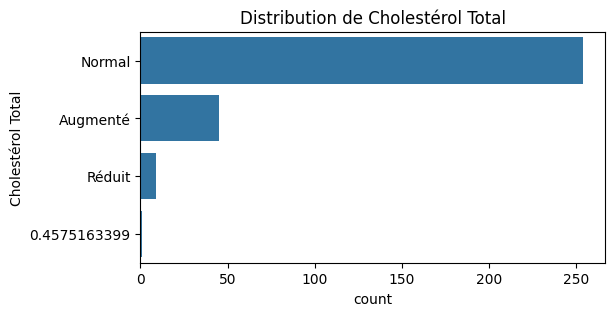


Colonne : Cholestérol HDL
Cholestérol HDL
Normal      276
Réduit       14
Augmenté     10
Normale       8
0.46732       1
Name: count, dtype: int64


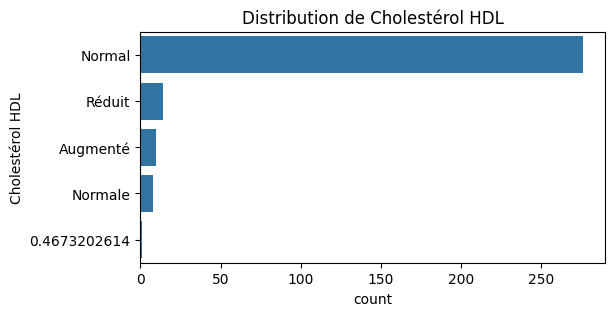


Colonne : Cholestérol LDL
Cholestérol LDL
Normal      241
Augmenté     42
Réduit       20
Normale       5
0.552288      1
Name: count, dtype: int64


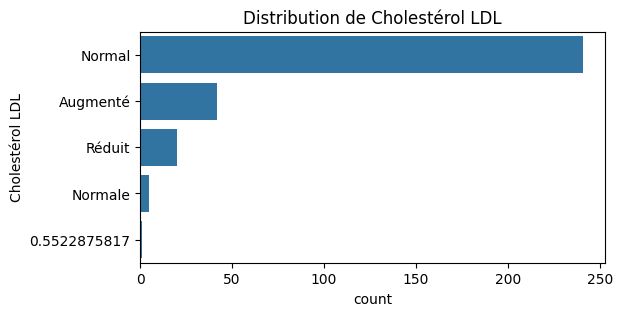


Colonne : Triglycérides
Triglycérides
Normal      264
Augmenté     28
Réduit        8
Normale       8
0.519608      1
Name: count, dtype: int64


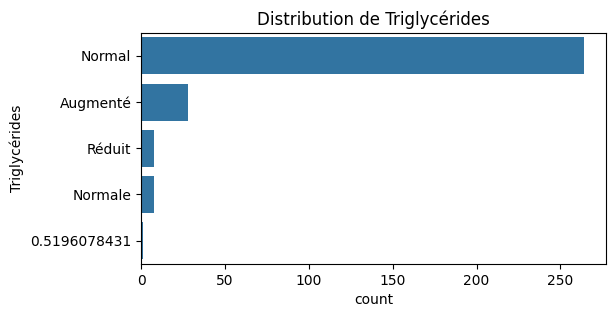


Colonne : Tests Populaires/PU (g/24h)
Tests Populaires/PU (g/24h)
+           288
-            20
0.637255      1
Name: count, dtype: int64


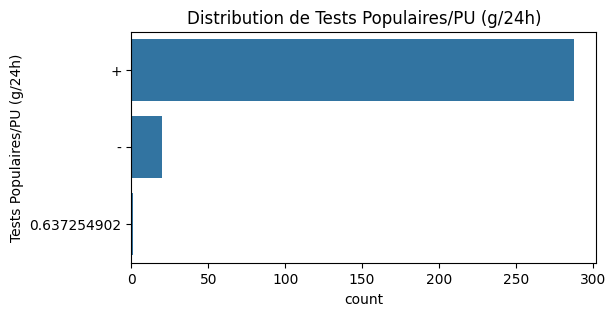


Colonne : Grosseur Rein Gauche 
Grosseur Rein Gauche 
Normal      267
Réduit       22
Augmenté     19
0.575163      1
Name: count, dtype: int64


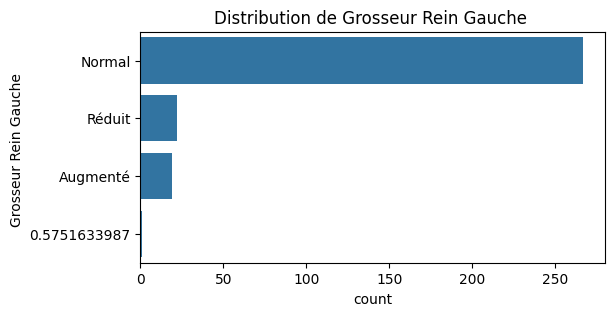


Colonne : Grosseur Rein Droit 
Grosseur Rein Droit 
Normal      269
Réduit       23
Augmenté     16
0.575163      1
Name: count, dtype: int64


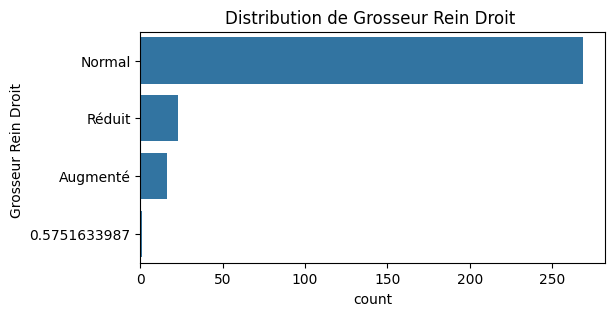


Colonne : Calcul Rénal
Calcul Rénal
Non         304
Oui           4
0.575163      1
Name: count, dtype: int64


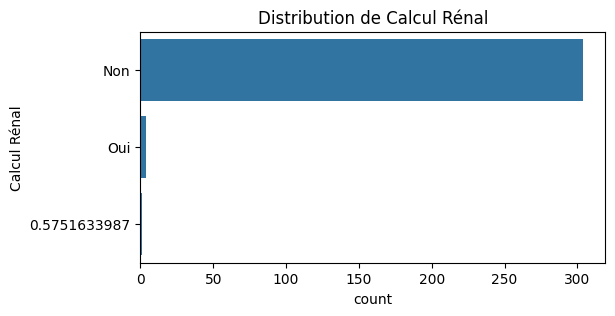


Colonne : Kyste
Kyste
Non         280
Oui          28
0.575163      1
Name: count, dtype: int64


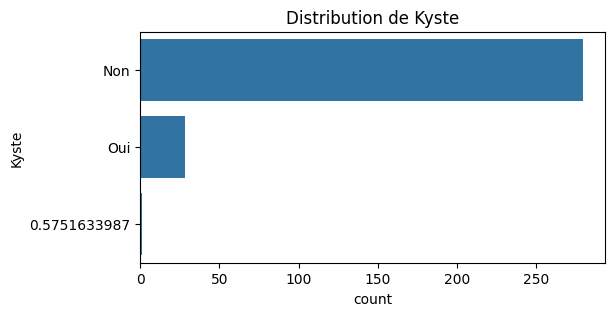


Colonne : Différenciation des reins
Différenciation des reins
Bien différenciés           280
Perte de différenciation     28
0.575163                      1
Name: count, dtype: int64


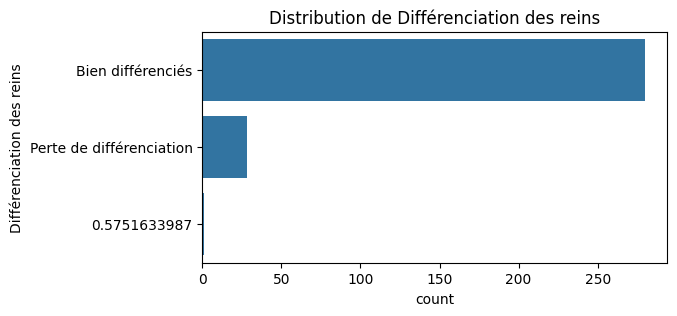


Colonne : Echogénicité
Echogénicité
Homogénéité           277
Hyper Echogénicité     30
Hypo Echogénicité       1
0.575163                1
Name: count, dtype: int64


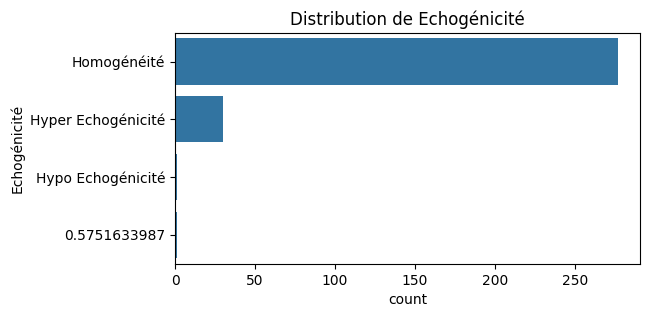


Colonne : Contour régulier/Rein droit
Contour régulier/Rein droit
Oui         305
Non           3
0.575163      1
Name: count, dtype: int64


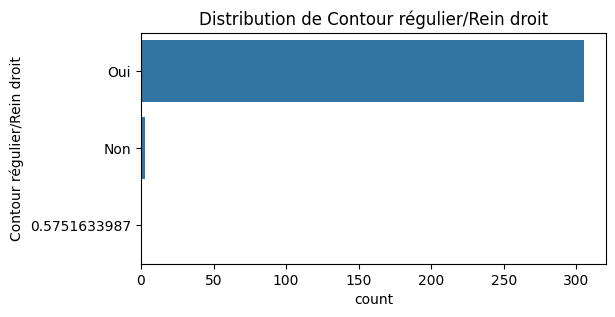


Colonne : Contour régulier/Rein gauche
Contour régulier/Rein gauche
Oui         307
Non           1
0.575163      1
Name: count, dtype: int64


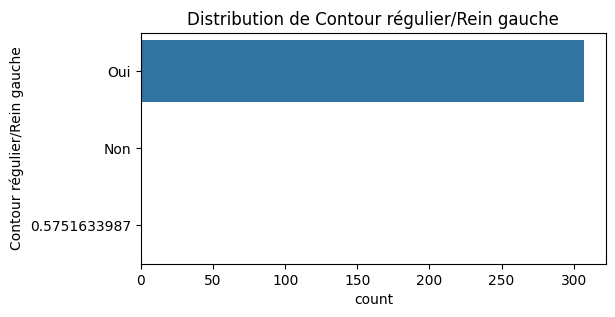


Colonne : Rythme Cardiaque/Régulier
Rythme Cardiaque/Régulier
Oui         296
Non          12
0.232026      1
Name: count, dtype: int64


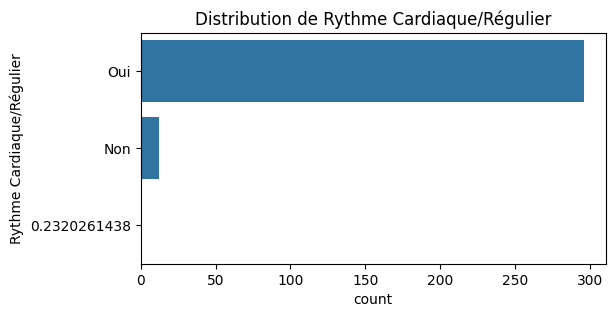


Colonne : Trouble de la Repolarisation
Trouble de la Repolarisation
Non         258
Oui          50
0.199346      1
Name: count, dtype: int64


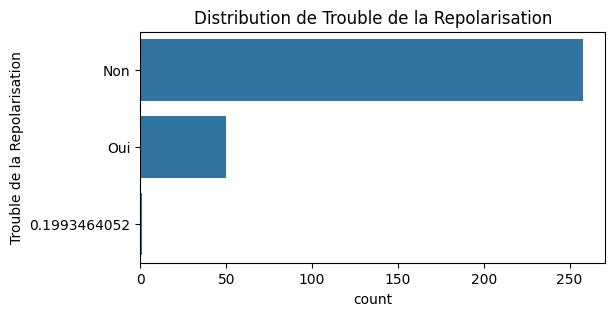


Colonne : Stage de l'IRC
Stage de l'IRC
CKD 5     62
CKD 2     52
CKD 4     50
CKD 3a    49
CKD 3b    49
CKD 1     46
0          1
Name: count, dtype: int64


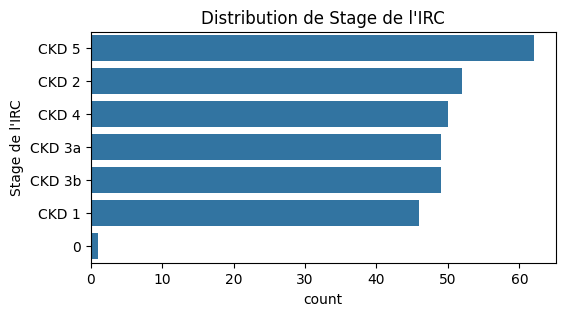


=== Analyse Univariée : Variables Binaires (0/1) ===

Colonne : Motif(s) d'Admission/Asthénie
Motif(s) d'Admission/Asthénie
0.0    276
1.0     33
Name: count, dtype: int64


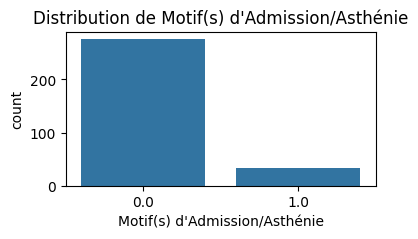


Colonne : Motif(s) d'Admission/Altération de la fonction rénale
Motif(s) d'Admission/Altération de la fonction rénale
1.0    206
0.0    103
Name: count, dtype: int64


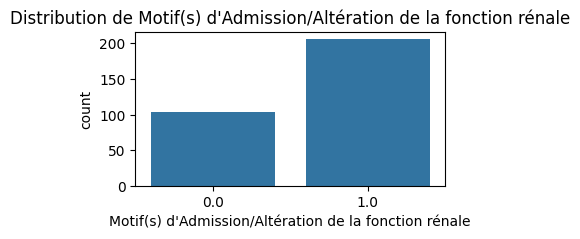


Colonne : Motif(s) d'Admission/HTA
Motif(s) d'Admission/HTA
0.0    294
1.0     15
Name: count, dtype: int64


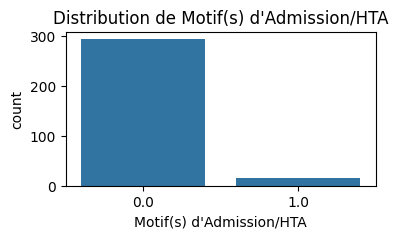


Colonne : Motif(s) d'Admission/Œdème
Motif(s) d'Admission/Œdème
0.0    280
1.0     29
Name: count, dtype: int64


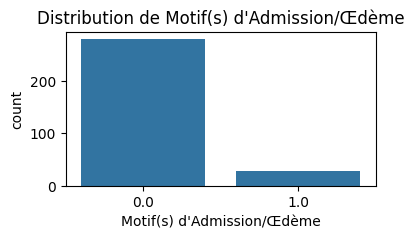


Colonne : Motif(s) d'Admission/Diabète
Motif(s) d'Admission/Diabète
0.0    301
1.0      8
Name: count, dtype: int64


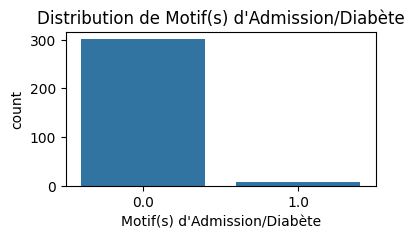


Colonne : Motif(s) d'Admission/Douleur abdominale
Motif(s) d'Admission/Douleur abdominale
0.0    304
1.0      5
Name: count, dtype: int64


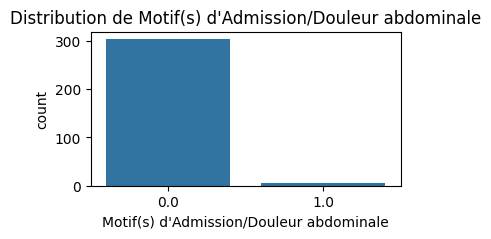


Colonne : Personnels Médicaux/HTA
Personnels Médicaux/HTA
1.0    242
0.0     67
Name: count, dtype: int64


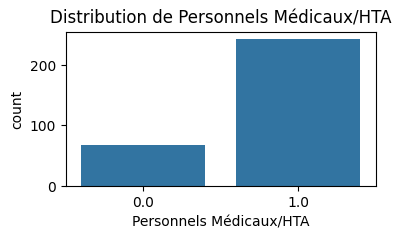


Colonne : Personnels Médicaux/Diabète 1
Personnels Médicaux/Diabète 1
0.0    304
1.0      5
Name: count, dtype: int64


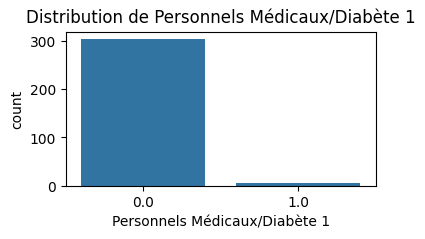


Colonne : Personnels Médicaux/Diabète 2
Personnels Médicaux/Diabète 2
0.0    215
1.0     94
Name: count, dtype: int64


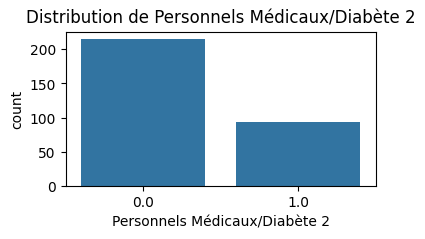


Colonne : Personnels Médicaux/IRC
Personnels Médicaux/IRC
0.0    280
1.0     29
Name: count, dtype: int64


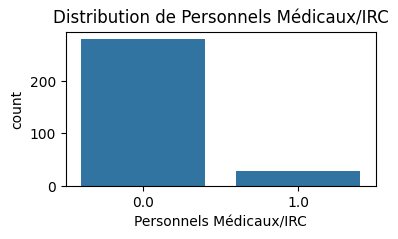


Colonne : Personnels Médicaux/Maladies Cardiovasculaire(Cardiopathie, AVC, preeclampsie)
Personnels Médicaux/Maladies Cardiovasculaire(Cardiopathie, AVC, preeclampsie)
0.0    275
1.0     34
Name: count, dtype: int64


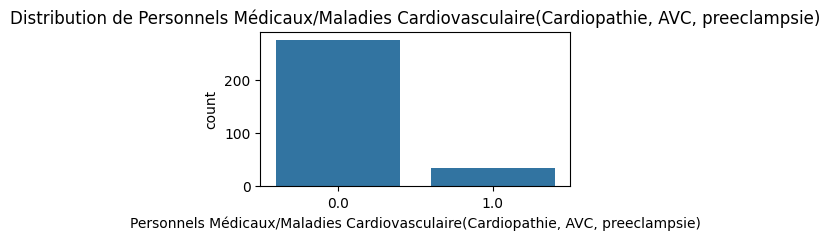


Colonne : Personnels Médicaux/Ulcère
Personnels Médicaux/Ulcère
0.0    288
1.0     21
Name: count, dtype: int64


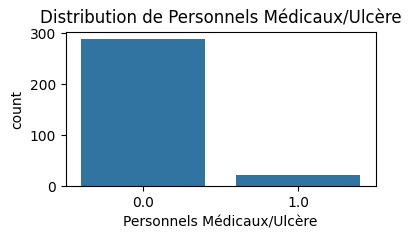


Colonne : Personnels Médicaux/Pathologies virales (HB, HC, HIV)
Personnels Médicaux/Pathologies virales (HB, HC, HIV)
0.0    291
1.0     18
Name: count, dtype: int64


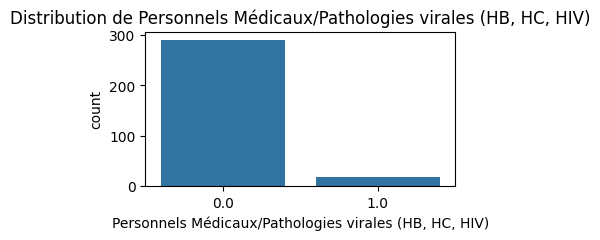


Colonne : Personnels Chirurgicaux/Appendicectomie
Personnels Chirurgicaux/Appendicectomie
0.0    295
1.0     14
Name: count, dtype: int64


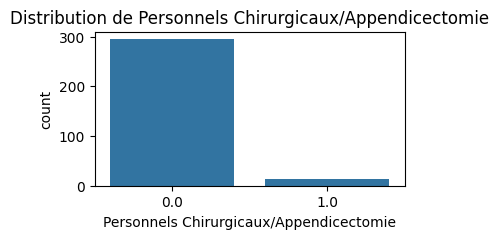


Colonne : Personnels Chirurgicaux/Césarienne
Personnels Chirurgicaux/Césarienne
0.0    294
1.0     15
Name: count, dtype: int64


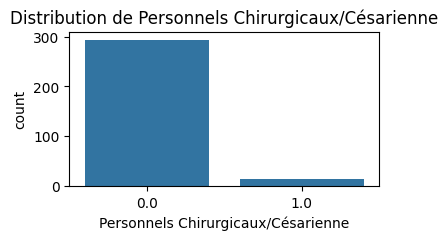


Colonne : Personnels Chirurgicaux/Hystérectomie
Personnels Chirurgicaux/Hystérectomie
0.0    298
1.0     11
Name: count, dtype: int64


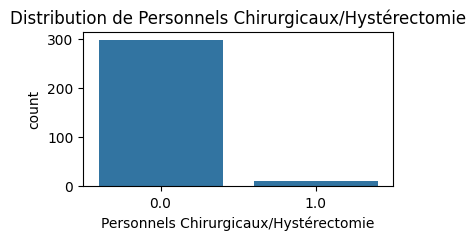


Colonne : Personnels Familiaux/HTA
Personnels Familiaux/HTA
0.0    295
1.0     14
Name: count, dtype: int64


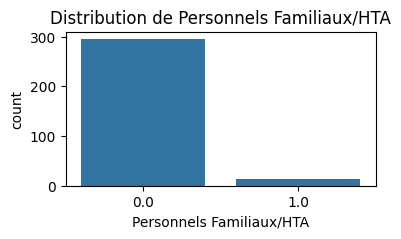


Colonne : Personnels Familiaux/Diabète
Personnels Familiaux/Diabète
0.0    299
1.0     10
Name: count, dtype: int64


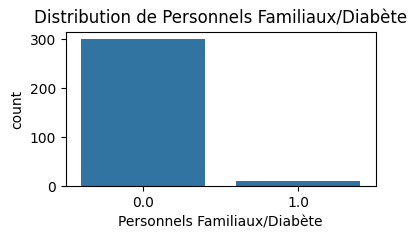


Colonne : Enquête Sociale/Tabac
Enquête Sociale/Tabac
0.0    304
1.0      5
Name: count, dtype: int64


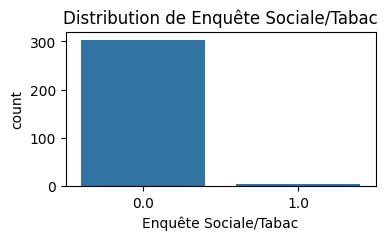


Colonne : Enquête Sociale/AlNS (+)
Enquête Sociale/AlNS (+)
0.0    277
1.0     32
Name: count, dtype: int64


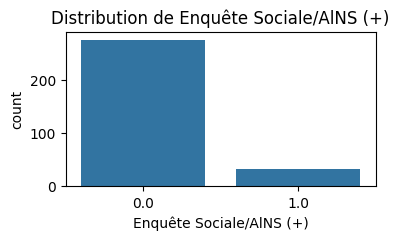


Colonne : Enquête Sociale/Alcool
Enquête Sociale/Alcool
0.0    265
1.0     44
Name: count, dtype: int64


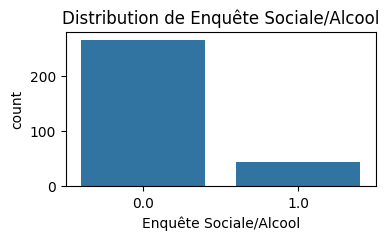


Colonne : AJ1=
AJ1=
0.0    227
1.0     82
Name: count, dtype: int64


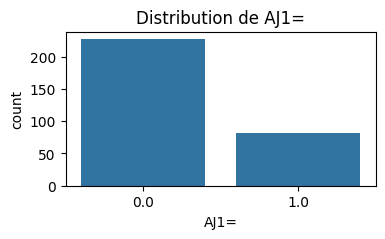


Colonne : Enquête Sociale/Epice
Enquête Sociale/Epice
0.0    300
1.0      9
Name: count, dtype: int64


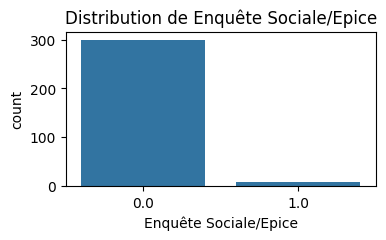


Colonne : Enquête Sociale/PEC oui
Enquête Sociale/PEC oui
0.0    265
1.0     44
Name: count, dtype: int64


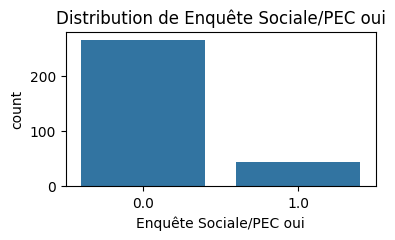


Colonne : Enquête Sociale/PEC non
Enquête Sociale/PEC non
0.0    208
1.0    101
Name: count, dtype: int64


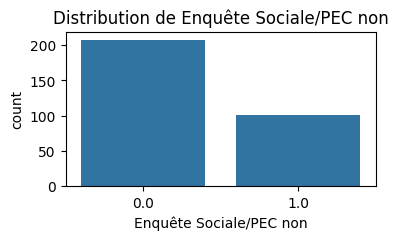


Colonne : Symptômes/Fièvre
Symptômes/Fièvre
0.0    286
1.0     23
Name: count, dtype: int64


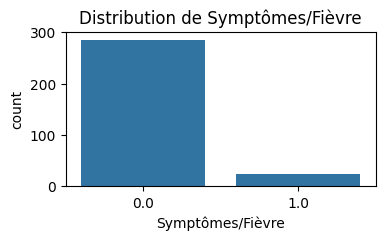


Colonne : Symptômes/Frissons
Symptômes/Frissons
0.0    303
1.0      6
Name: count, dtype: int64


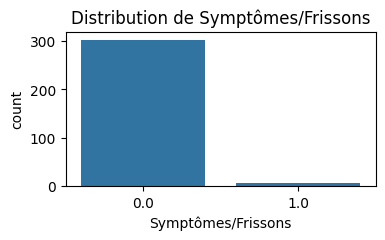


Colonne : Symptômes/Céphalées
Symptômes/Céphalées
0.0    281
1.0     28
Name: count, dtype: int64


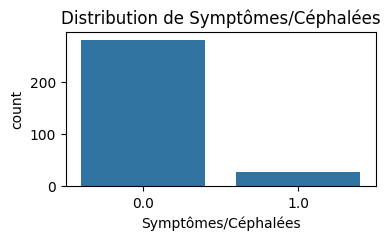


Colonne : Symptômes/Douleur Lombaire
Symptômes/Douleur Lombaire
0.0    283
1.0     26
Name: count, dtype: int64


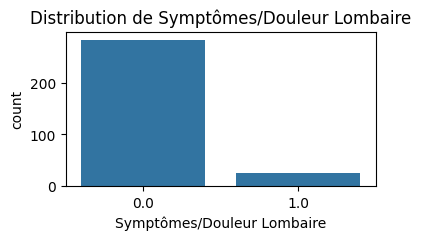


Colonne : Symptômes/Dysurie
Symptômes/Dysurie
0.0    305
1.0      4
Name: count, dtype: int64


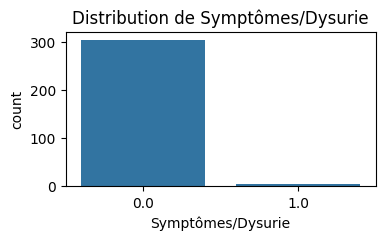


Colonne : Symptômes/Oligurie
Symptômes/Oligurie
0.0    293
1.0     16
Name: count, dtype: int64


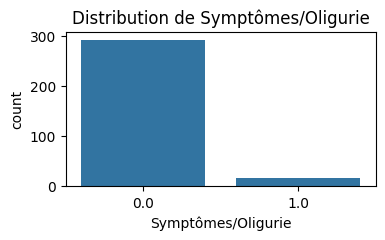


Colonne : Symptômes/Diarrhée
Symptômes/Diarrhée
0.0    283
1.0     26
Name: count, dtype: int64


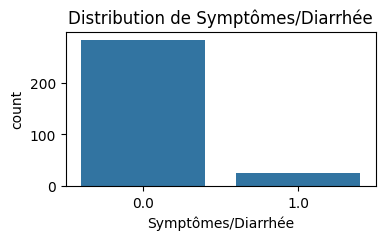


Colonne : Symptômes/Douleur Thoracique
Symptômes/Douleur Thoracique
0.0    300
1.0      9
Name: count, dtype: int64


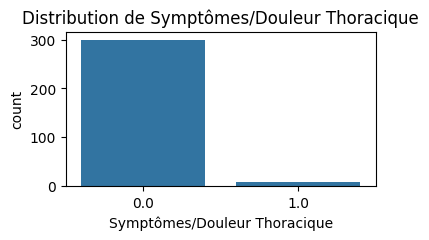


Colonne : Symptômes/Anorexie
Symptômes/Anorexie
0.0    287
1.0     22
Name: count, dtype: int64


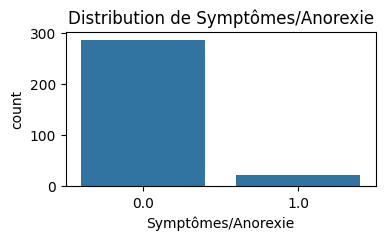


Colonne : Symptômes/Anémie
Symptômes/Anémie
0.0    284
1.0     25
Name: count, dtype: int64


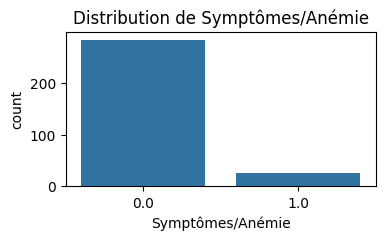


Colonne : Symptômes/Nausées
Symptômes/Nausées
0.0    291
1.0     18
Name: count, dtype: int64


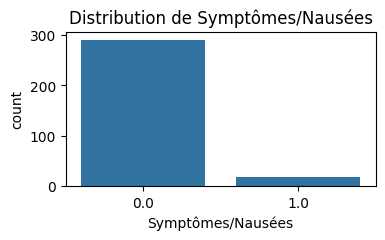


Colonne : Symptômes/Douleur abdominale
Symptômes/Douleur abdominale
0.0    276
1.0     33
Name: count, dtype: int64


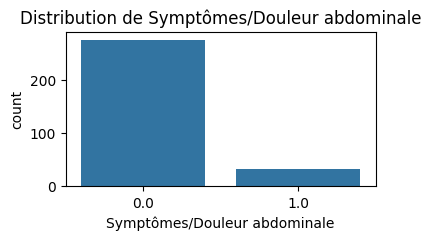


Colonne : Symptômes/Articulaire
Symptômes/Articulaire
0.0    290
1.0     19
Name: count, dtype: int64


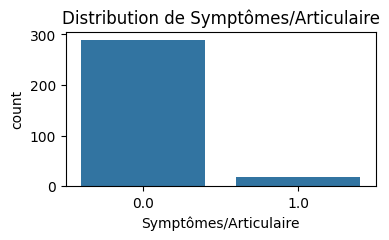


Colonne : Symptômes/HTA
Symptômes/HTA
0.0    294
1.0     15
Name: count, dtype: int64


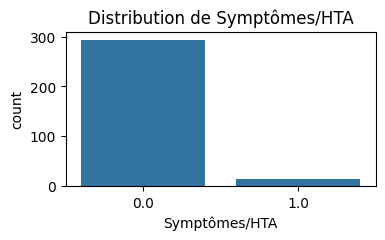


Colonne : Symptômes/Flou visuel
Symptômes/Flou visuel
0.0    296
1.0     13
Name: count, dtype: int64


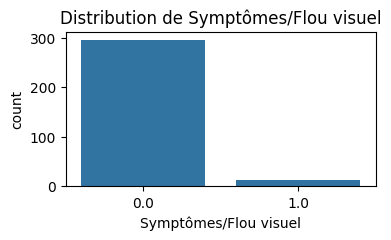


Colonne : Symptômes/Asthénie
Symptômes/Asthénie
0.0    221
1.0     88
Name: count, dtype: int64


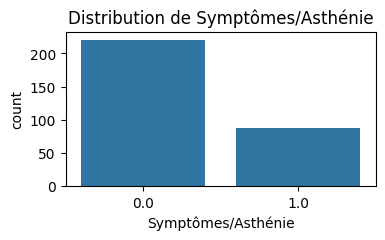


Colonne : Symptômes/Vomissements
Symptômes/Vomissements
0.0    263
1.0     46
Name: count, dtype: int64


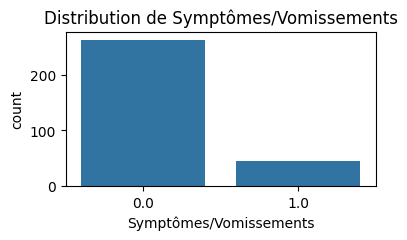


Colonne : Symptômes/Insomnie
Symptômes/Insomnie
0.0    271
1.0     38
Name: count, dtype: int64


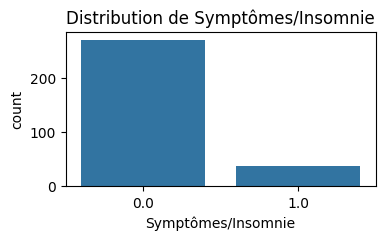


Colonne : Symptômes/Nycturie
Symptômes/Nycturie
0.0    285
1.0     24
Name: count, dtype: int64


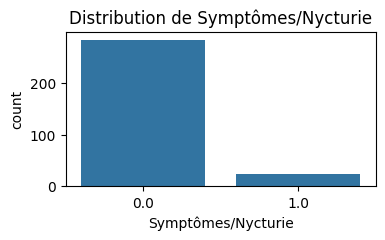


Colonne : Symptômes/Toux Grave
Symptômes/Toux Grave
0.0    287
1.0     22
Name: count, dtype: int64


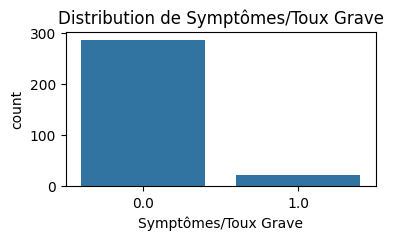


Colonne : Symptômes/Détresse Respiratoire
Symptômes/Détresse Respiratoire
0.0    302
1.0      7
Name: count, dtype: int64


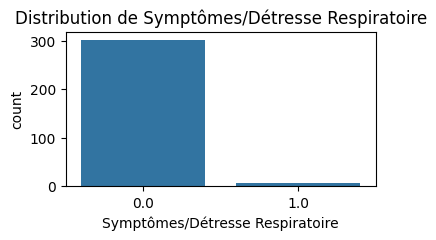


Colonne : Symptômes/Perte de poids
Symptômes/Perte de poids
0.0    298
1.0     11
Name: count, dtype: int64


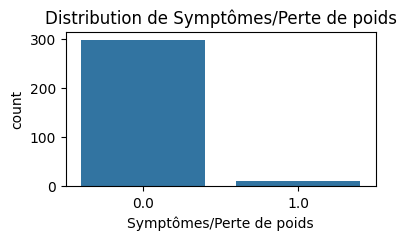


Colonne : Symptômes/Bouffissure du Visage
Symptômes/Bouffissure du Visage
0.0    290
1.0     19
Name: count, dtype: int64


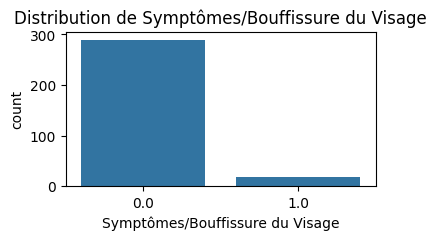


Colonne : Evolution de l'Etat Générale/Favorable
Evolution de l'Etat Générale/Favorable
0.0    213
1.0     96
Name: count, dtype: int64


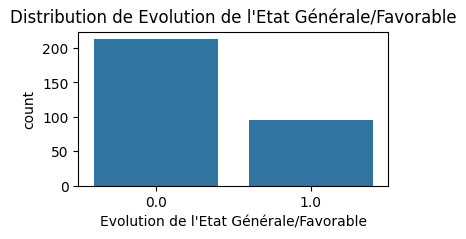


Colonne : Evolution de l'Etat Générale/Pas Favorable
Evolution de l'Etat Générale/Pas Favorable
1.0    170
0.0    139
Name: count, dtype: int64


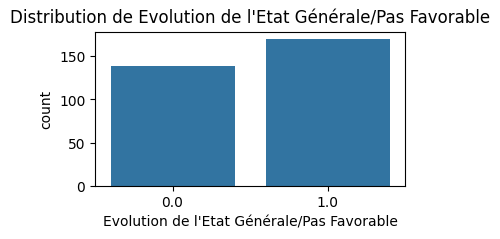


Colonne : Evolution de l'Etat Générale/Patient Perdu de vue
Evolution de l'Etat Générale/Patient Perdu de vue
1.0    189
0.0    120
Name: count, dtype: int64


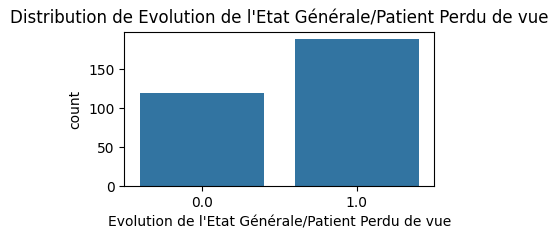


Colonne : Etat Général (EG)/OMI
Etat Général (EG)/OMI
0.0    208
1.0    101
Name: count, dtype: int64


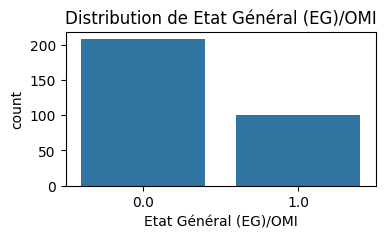


Colonne : Etat Général (EG)/Plis de déshydratation
Etat Général (EG)/Plis de déshydratation
0.0    299
1.0     10
Name: count, dtype: int64


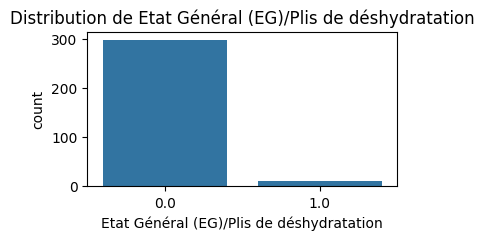


Colonne : OMI/Prenant le godet
OMI/Prenant le godet
0.0    201
1.0    108
Name: count, dtype: int64


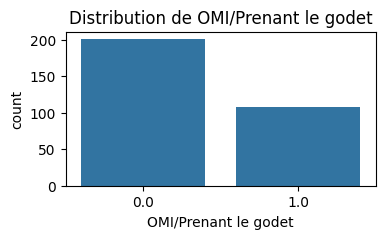


Colonne : Pathologies/Rétinopathie hypertensive
Pathologies/Rétinopathie hypertensive
0.0    278
1.0     31
Name: count, dtype: int64


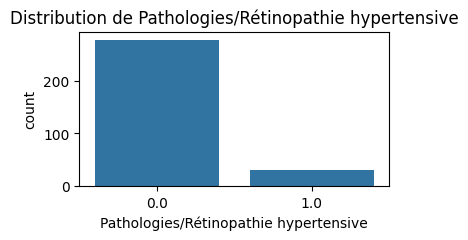


Colonne : Pathologies/Rétinopathie diabétique
Pathologies/Rétinopathie diabétique
0.0    299
1.0     10
Name: count, dtype: int64


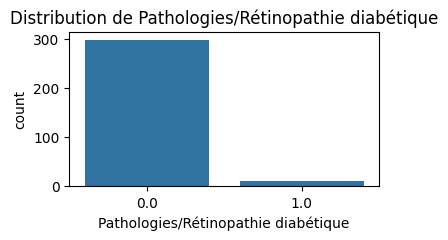


Colonne : Pathologies/Glaucome
Pathologies/Glaucome
0.0    298
1.0     11
Name: count, dtype: int64


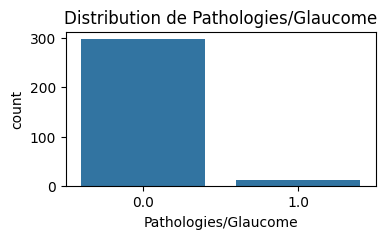


Colonne : Rythme Cardiaque/Sinusal
Rythme Cardiaque/Sinusal
1.0    249
0.0     60
Name: count, dtype: int64


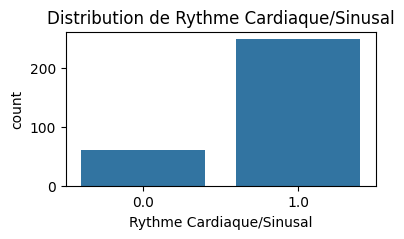


=== Analyse Univariée : Target Stage de l'IRC ===
Stage de l'IRC
CKD 5     62
CKD 2     52
CKD 4     50
CKD 3a    49
CKD 3b    49
CKD 1     46
0          1
Name: count, dtype: int64


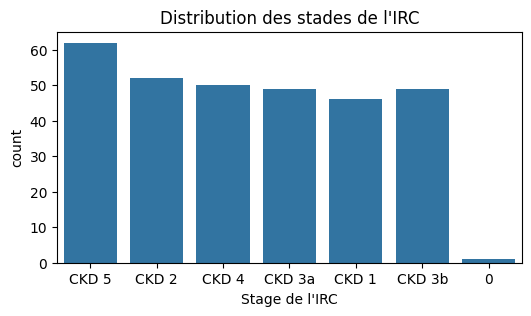

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# Étape 1 : Détection automatique des types
# ================================

# Target
target_col = "Stage de l'IRC"

# Colonnes numériques
numeric_cols = df_filtered.select_dtypes(include=['number']).columns.tolist()

# Retirer la target si elle est numérique
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

# Détection des colonnes binaires (0/1)
binary_cols = [col for col in numeric_cols
               if df_filtered[col].nunique() == 2]

# Retirer les binaires des numériques continues
numeric_cols = [col for col in numeric_cols if col not in binary_cols]

# Colonnes catégorielles
categorical_cols = df_filtered.select_dtypes(include=['object', 'category']).columns.tolist()

# ================================
# Étape 2 : Analyse Univariée
# ================================

# -------- 2a) Variables numériques continues --------
print("\n=== Analyse Univariée : Variables Numériques ===")

for col in numeric_cols:
    print(f"\nColonne : {col}")
    print(df_filtered[col].describe())

    plt.figure(figsize=(6,3))
    sns.histplot(df_filtered[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.show()


# -------- 2b) Variables catégorielles --------
print("\n=== Analyse Univariée : Variables Catégorielles ===")

for col in categorical_cols:
    print(f"\nColonne : {col}")
    print(df_filtered[col].value_counts(dropna=False))

    plt.figure(figsize=(6,3))
    sns.countplot(y=col, data=df_filtered,
                  order=df_filtered[col].value_counts().index)
    plt.title(f'Distribution de {col}')
    plt.show()


# -------- 2c) Variables binaires (0/1) --------
print("\n=== Analyse Univariée : Variables Binaires (0/1) ===")

for col in binary_cols:
    print(f"\nColonne : {col}")
    print(df_filtered[col].value_counts())

    plt.figure(figsize=(4,2))
    sns.countplot(x=col, data=df_filtered)
    plt.title(f'Distribution de {col}')
    plt.show()


# -------- 2d) Target --------
print("\n=== Analyse Univariée : Target Stage de l'IRC ===")

print(df_filtered[target_col].value_counts())

plt.figure(figsize=(6,3))
sns.countplot(x=target_col, data=df_filtered)
plt.title("Distribution des stades de l'IRC")
plt.show()

In [ ]:
# ================================
# LISTE FINALE DES FEATURES
# ================================

features = [

# 🔹 1. Démographiques
"Age",
"Sexe",
"Poids (Kg)",
"Taille (m)",

# 🔹 2. Signes vitaux
"TA (mmHg)/Systole",
"TA (mmHg)/Diastole",
"Poul (bpm)",
"Température (C°)",
"Conscience",
"Score de Glasgow (/15)",

# 🔹 3. Biologie sanguine
"Créatinine (mg/L)",
"Urée (g/L)",
"Na^+ (meq/L)",
"K^+ (meq/L)",
"Cl^- (meq/L)",
"Ca^2+ (meq/L)",
"P (meq/L)",
"Glycémie à jeun (taux de Glucose)",
"Cholestérol Total",
"Cholestérol HDL",
"Cholestérol LDL",
"Triglycérides",

# 🔹 4. Hématologie
"Hb (g/dL)",
"Hte (%)",
"VGM (fL)",
"TCMH (pg)",
"CCMH (%)",
"NB (G/L)",
"Plaquettes (g/L)",
"Anémie",

# 🔹 5. Urinaire
"Diurèse",
"Tests Populaires/PU (g/24h)",

# 🔹 6. Echographie
"Grosseur Rein Gauche ",
"Grosseur Rein Droit ",
"Différenciation des reins",
"Echogénicité",
"Contour régulier/Rein droit",
"Contour régulier/Rein gauche",
"Calcul Rénal",
"Kyste",

# 🔹 7. Comorbidités
"Personnels Médicaux/HTA",
"Personnels Médicaux/Diabète 2",
"Pathologies/Rétinopathie hypertensive",
"Pathologies/Rétinopathie diabétique"
]

# ================================
# TARGET
# ================================

target = "Stage de l'IRC"

# ================================
# EXTRACTION
# ================================

feat = df_filtered[features]
y = df_filtered[target]

print("Shape feat:", feat.shape)
print("Shape y :", y.shape)


Shape feat: (309, 44)
Shape y : (309,)


In [ ]:
feat

Age      Sexe  Poids (Kg)  Taille (m)  TA (mmHg)/Systole  \
0    50.000000         F   73.000000     1.64000         140.000000   
1    28.000000         M   73.000000     1.64000         130.000000   
2    69.000000         F   73.000000     1.64000          93.000000   
3    68.000000         M   73.000000     1.64000         130.000000   
4    68.000000         F   73.000000     1.64000         225.000000   
..         ...       ...         ...         ...                ...   
304  65.000000         F   88.000000     1.61000         201.000000   
305  76.000000         F   47.000000     1.53000         117.000000   
306  57.000000         M   73.000000     1.64000         138.500000   
307  57.000000         M   73.000000     1.64000         138.500000   
308   0.022876  0.026144    0.411765     0.54902           0.199346   

     TA (mmHg)/Diastole  Poul (bpm)  Température (C°) Conscience  \
0             80.000000    85.00000         37.000000     Claire   
1             80.000000   110.00000         39.000000     Claire   
2             34.000000    19.00000         37.600000     Claire   
3             70.000000    82.00000         37.800000     Claire   
4            111.000000    69.00000         37.000000     Claire   
..                  ...         ...               ...        ...   
304           79.000000    71.00000         36.900000     Claire   
305           73.000000    93.00000         35.000000     Claire   
306           82.000000    83.00000         36.900000     Claire   
307           82.000000    83.00000         36.900000     Claire   
308            0.199346     0.22549          0.565359   0.035948   

     Score de Glasgow (/15)  Créatinine (mg/L)  Urée (g/L)  Na^+ (meq/L)  \
0                 15.000000             169.00    1.290000    131.000000   
1                 15.000000              17.00    0.660000    134.000000   
2                 14.000000              48.00    0.790000    139.000000   
3                 15.000000              42.00    1.140000    142.000000   
4                 15.000000             500.00    0.450000    139.000000   
..                      ...                ...         ...           ...   
304               15.000000              12.00    0.490000    140.000000   
305               15.000000              13.00    0.450000    140.000000   
306               15.000000              17.36    0.450000    139.000000   
307               15.000000              17.36    0.450000    139.000000   
308                0.101307               0.00    0.069909      0.102639   

     K^+ (meq/L)  Cl^- (meq/L)  Ca^2+ (meq/L)  P (meq/L)  \
0       6.400000     96.000000      82.000000  43.000000   
1       5.300000     95.000000      92.000000  38.000000   
2       3.400000    100.000000      87.000000  38.000000   
3       5.700000    104.000000      88.000000  94.000000   
4       4.100000    102.000000      92.000000  38.000000   
..           ...           ...            ...        ...   
304     3.700000    100.000000      93.000000  36.000000   
305     6.100000    103.000000     106.000000  38.000000   
306     4.100000    102.000000      92.000000  38.000000   
307     4.100000    102.000000      92.000000  38.000000   
308     0.089286      0.138028       0.229219   0.365145   

     Glycémie à jeun (taux de Glucose) Cholestérol Total Cholestérol HDL  \
0                             0.980000            Normal          Normal   
1                             0.980000            Normal          Normal   
2                             2.870000            Normal          Normal   
3                             1.000000            Normal          Normal   
4                             0.980000            Normal          Normal   
..                                 ...               ...             ...   
304                           0.990000            Normal          Normal   
305                           0.790000          Augmenté          Normal   
306                    

In [ ]:
# ================================
# Affichage de la liste finale des features
# ================================

# feature_cols correspond aux colonnes utilisées pour X dans ton modèle
print("✅ Nombre total de features :", len(feat.columns))
print("✅ Liste finale des features :")
for i, col in enumerate(feat.columns, start=1):
    print(f"{i}. {col}")


✅ Nombre total de features : 44
✅ Liste finale des features :
1. Age
2. Sexe
3. Poids (Kg)
4. Taille (m)
5. TA (mmHg)/Systole
6. TA (mmHg)/Diastole
7. Poul (bpm)
8. Température (C°)
9. Conscience
10. Score de Glasgow (/15)
11. Créatinine (mg/L)
12. Urée (g/L)
13. Na^+ (meq/L)
14. K^+ (meq/L)
15. Cl^- (meq/L)
16. Ca^2+ (meq/L)
17. P (meq/L)
18. Glycémie à jeun (taux de Glucose)
19. Cholestérol Total
20. Cholestérol HDL
21. Cholestérol LDL
22. Triglycérides
23. Hb (g/dL)
24. Hte (%)
25. VGM (fL)
26. TCMH (pg)
27. CCMH (%)
28. NB (G/L)
29. Plaquettes (g/L)
30. Anémie
31. Diurèse
32. Tests Populaires/PU (g/24h)
33. Grosseur Rein Gauche 
34. Grosseur Rein Droit 
35. Différenciation des reins
36. Echogénicité
37. Contour régulier/Rein droit
38. Contour régulier/Rein gauche
39. Calcul Rénal
40. Kyste
41. Personnels Médicaux/HTA
42. Personnels Médicaux/Diabète 2
43. Pathologies/Rétinopathie hypertensive
44. Pathologies/Rétinopathie diabétique


In [ ]:
# Afficher les 10 premières lignes du dataset X
import pandas as pd

pd.set_option('display.max_columns', None)  # Affiche toutes les colonnes
pd.set_option('display.max_rows', 50)       # Affiche jusqu'à 50 lignes (modifie selon besoin)

# Affichage
display(feat.head(50))  # Affiche les 50 premières lignes du dataset


Age Sexe  Poids (Kg)  Taille (m)  TA (mmHg)/Systole  TA (mmHg)/Diastole  \
0   50.0    F        73.0        1.64              140.0                80.0   
1   28.0    M        73.0        1.64              130.0                80.0   
2   69.0    F        73.0        1.64               93.0                34.0   
3   68.0    M        73.0        1.64              130.0                70.0   
4   68.0    F        73.0        1.64              225.0               111.0   
5   58.0    M        73.0        1.64              150.0                80.0   
6   48.0    M        73.0        1.64              108.0                63.0   
7   41.0    M        73.0        1.64              215.0               135.0   
8   42.0    F        73.0        1.64              169.0               111.0   
9   55.0    F        73.0        1.64              110.0                60.0   
10  38.0    M        73.0        1.64              164.0               113.0   
11  57.0    F        73.0        1.64              143.0                89.0   
12  56.0    M        73.0        1.64              120.0                80.0   
13  31.0    M        55.0        1.64              173.0               114.0   
14  18.0    F        50.0        1.64              180.0               102.0   
15  65.0    M        73.0        1.64              161.0                74.0   
16  59.0    M        62.0        1.62               90.0                43.0   
17  70.0    F        73.0        1.64              120.0                70.0   
18  30.0    F        73.0        1.64              144.0               103.0   
19  45.0    M        73.0        1.64              150.0                70.0   
20  31.0    M        73.0        1.64              128.0                68.0   
21  53.0    M        80.0        1.80              125.0                79.0   
22  29.0    M        73.0        1.64              220.0               130.0   
23  42.0    M        73.0        1.64              204.0               134.0   
24  32.0    M        73.0        1.64              150.0                90.0   
25  64.0    M        60.0        1.64              140.0                90.0   
26  38.0    F        73.0        1.64              178.0               110.0   
27  39.0    M        73.0        1.64              127.0                93.0   
28  31.0    M        55.0        1.64              191.0               130.0   
29  37.0    M        73.0        1.64              198.0               100.0   
30  47.0    M        73.0        1.64              191.0               123.0   
31  28.0    F        73.0        1.64              123.0                71.0   
32  72.0    M        53.0        1.64              120.0                60.0   
33  34.0    M        73.0        1.64              177.0               127.0   
34  74.0    M        73.0        1.64              180.0               126.0   
35  48.0    M        70.0        1.76              130.0                70.0   
36  35.0    M        73.0        1.64              169.0               121.0   
37  35.0    M        73.0        1.64              172.0               115.0   
38  54.0    M        73.0        1.64              132.0                77.0   
39  29.0    F        73.0        1.64              134.0                76.0   
40  36.0    F        73.0        1.64              150.0                90.0   
41  24.0    F        73.0        1.64              192.0               112.0   
42  48.0    F        73.0        1.64              107.0                68.0   
43  38.0    F        73.0        1.64               73.0                33.0   
44  75.0    F        48.0        1.64              160.0               100.0   
45  62.0    F        73.0        1.64              142.0                85.0   
46  54.0    M        73.0        1.64              120.0                70.0   
47  50.0    M        73.0        1.64              138.5                82.0   
48  40.0    M        73.0        1.64              170.0               100.0   
49  4

In [ ]:
import numpy as np
import pandas as pd

def calcul_dfg_ckd_epi(sexe, age, creatinine_mg_L):
    """
    Calcule le DFG selon la formule CKD-EPI 2021 (sans facteur ethnique).

    Paramètres :
    - sexe : 'F' ou 'M'
    - age : âge en années
    - creatinine_mg_L : créatinine en mg/L

    Retour :
    - DFG estimé en mL/min/1.73m² (arrondi à 2 décimales)
    """

    # Vérification des valeurs manquantes ou invalides
    if pd.isna(creatinine_mg_L) or pd.isna(age) or pd.isna(sexe):
        return np.nan
    if creatinine_mg_L <= 0 or age <= 0:
        return np.nan

    # Conversion mg/L → mg/dL
    creatinine_mg_dL = creatinine_mg_L / 10

    # Conversion sexe en string
    sexe_str = str(sexe).upper()

    # Paramètres selon le sexe
    if sexe_str == 'F':
        kappa = 0.7
        alpha = -0.241
        facteur_sexe = 1.012
    elif sexe_str == 'M':
        kappa = 0.9
        alpha = -0.302
        facteur_sexe = 1.0
    else:
        return np.nan  # sexe invalide

    # Formule CKD-EPI 2021
    dfg = (
        142
        * min(creatinine_mg_dL / kappa, 1) ** alpha
        * max(creatinine_mg_dL / kappa, 1) ** -1.200
        * (0.9938 ** age)
        * facteur_sexe
    )

    return round(dfg, 2)


In [ ]:
df_filtered["dfg"] = df_filtered.apply(
    lambda row: calcul_dfg_ckd_epi(
        row["Sexe"],
        row["Age"],
        row["Créatinine (mg/L)"]
    ),
    axis=1
)


In [ ]:
display(df_filtered[["Sexe", "Age", "Créatinine (mg/L)", "dfg"]].head(10))


Sexe   Age  Créatinine (mg/L)    dfg
0    F  50.0              169.0   2.31
1    M  28.0               17.0  55.62
2    F  69.0               48.0   9.28
3    M  68.0               42.0  14.65
4    F  68.0              500.0   0.56
5    M  58.0              156.0   3.23
6    M  48.0              112.9   5.06
7    M  41.0              171.0   3.21
8    F  42.0              379.0   0.92
9    F  55.0               93.0   4.58

In [ ]:
# Retirer la ligne supplémentaire dans df_filtered
df_filtered_clean = df_filtered.loc[df_filtered.index.isin(feat.index)]

# Ajouter la colonne dfg à feat
feat["dfg"] = df_filtered_clean["dfg"].values


/tmp/ipython-input-2185370610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat["dfg"] = df_filtered_clean["dfg"].values


In [ ]:
print("\nAperçu des 10 premières lignes de feat :")
display(feat.head(10))



Aperçu des 10 premières lignes de feat :


Age Sexe  Poids (Kg)  Taille (m)  TA (mmHg)/Systole  TA (mmHg)/Diastole  \
0  50.0    F        73.0        1.64              140.0                80.0   
1  28.0    M        73.0        1.64              130.0                80.0   
2  69.0    F        73.0        1.64               93.0                34.0   
3  68.0    M        73.0        1.64              130.0                70.0   
4  68.0    F        73.0        1.64              225.0               111.0   
5  58.0    M        73.0        1.64              150.0                80.0   
6  48.0    M        73.0        1.64              108.0                63.0   
7  41.0    M        73.0        1.64              215.0               135.0   
8  42.0    F        73.0        1.64              169.0               111.0   
9  55.0    F        73.0        1.64              110.0                60.0   

   Poul (bpm)  Température (C°) Conscience  Score de Glasgow (/15)  \
0        85.0              37.0     Claire                    15.0   
1       110.0              39.0     Claire                    15.0   
2        19.0              37.6     Claire                    14.0   
3        82.0              37.8     Claire                    15.0   
4        69.0              37.0     Claire                    15.0   
5        70.0              37.6     Claire                    15.0   
6        67.0              37.5     Claire                    15.0   
7       102.0              36.9     Claire                    15.0   
8        86.0              36.4     Claire                    15.0   
9       114.0              37.3     Claire                    15.0   

   Créatinine (mg/L)  Urée (g/L)  Na^+ (meq/L)  K^+ (meq/L)  Cl^- (meq/L)  \
0              169.0        1.29         131.0         6.40          96.0   
1               17.0        0.66         134.0         5.30          95.0   
2               48.0        0.79         139.0         3.40         100.0   
3               42.0        1.14         142.0         5.70         104.0   
4              500.0        0.45         139.0         4.10         102.0   
5              156.0        1.58         130.0         5.10          96.0   
6              112.9      189.00         133.5         4.01         100.5   
7              171.0        1.14         140.0         3.80         102.0   
8              379.0        3.03         141.0         4.10         106.0   
9               93.0        2.13         123.0         4.10          87.0   

   Ca^2+ (meq/L)  P (meq/L)  Glycémie à jeun (taux de Glucose)  \
0           82.0       43.0                               0.98   
1           92.0       38.0                               0.98   
2           87.0       38.0                               2.87   
3           88.0       94.0                               1.00   
4           92.0       38.0                               0.98   
5           92.0       38.0                               1.75   
6           72.4       38.0                               1.78   
7           87.0       50.0                               0.80   
8           88.0       55.0                               0.65   
9           85.0       39.0                               3.77   

  Cholestérol Total Cholestérol HDL Cholestérol LDL Triglycérides  Hb (g/dL)  \
0            Normal          Normal          Normal        Normal       11.4   
1            Normal          Normal          Normal        Normal        9.5   
2            Normal          Normal          Normal        Normal        9.6   
3            Normal          Normal          Normal        Normal        8.2   
4            Normal          Normal          Normal        Normal        9.0   
5            Normal          Normal          Normal        Normal        6.6   
6            Réduit          Normal          Normal        Normal       12.4   
7          Augmenté          Normal        Augmenté        Normal       10.9   
8            Normal          Normal          Réduit        Normal   

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder

# 🔹 Copier le dataset
df_ml = df_filtered.copy()

# ================================
# 1️⃣ CIBLE : Stage de l'IRC
# ================================

# Nettoyage
df_ml["Stage de l'IRC"] = df_ml["Stage de l'IRC"].astype(str).str.strip()

# Supprimer valeurs manquantes
df_ml = df_ml[df_ml["Stage de l'IRC"].notna()]

# 🚨 Supprimer la valeur "0" (classe invalide)
df_ml = df_ml[df_ml["Stage de l'IRC"] != "0"]

# Vérification avant encodage
print("Valeurs uniques AVANT encodage :")
print(df_ml["Stage de l'IRC"].unique())

# Encodage propre
le = LabelEncoder()
df_ml["Stage_de_l_IRC_Encoded"] = le.fit_transform(df_ml["Stage de l'IRC"])

# Vérification finale
print("\nEncodage des classes :")
for i, class_ in enumerate(le.classes_):
    print(f"{class_} --> {i}")

# ================================
# 2️⃣ VARIABLES BINAIRES
# ================================

binary_vars = [
    "Sexe",
    "Personnels Médicaux/HTA",
    "Personnels Médicaux/Diabète 2",
    "Pathologies/Rétinopathie hypertensive",
    "Pathologies/Rétinopathie diabétique",
    "Anémie",
    "Calcul Rénal",
    "Kyste",
    "Contour régulier/Rein droit",
    "Contour régulier/Rein gauche"
]

for col in binary_vars:
    df_ml[col + "_Encoded"] = df_ml[col].map({
        "Oui": 1, "Non": 0,
        "F": 1, "H": 0
    }).fillna(0)

# ================================
# 3️⃣ VARIABLES ORDINALES
# ================================

echogen_mapping = [
    "Normale", "Légère", "Modérée", "Sévère",
    "Normal", "Hyper Echogénicité", "Hypo Echogénicité"
]

df_ml["Echogénicité_Encoded"] = OrdinalEncoder(
    categories=[echogen_mapping],
    handle_unknown='use_encoded_value',
    unknown_value=-1
).fit_transform(df_ml[["Echogénicité"]])

diff_mapping = ["Conservée", "Diminuée", "Disparue"]

df_ml["Différenciation des reins_Encoded"] = OrdinalEncoder(
    categories=[diff_mapping],
    handle_unknown='use_encoded_value',
    unknown_value=-1
).fit_transform(df_ml[["Différenciation des reins"]])

df_ml["Score de Glasgow (/15)_Encoded"] = pd.to_numeric(
    df_ml["Score de Glasgow (/15)"], errors='coerce'
)

# ================================
# 4️⃣ VARIABLES LIPIDIQUES ET URINAIRES
# ================================

lipides_mapping = {"Réduit":0, "Normal":1, "Normale":1, "Augmenté":2}

for col in ["Cholestérol Total", "Cholestérol HDL",
            "Cholestérol LDL", "Triglycérides"]:
    df_ml[col + "_Encoded"] = df_ml[col].map(lipides_mapping)

diurese_mapping = {
    "Anurie":0,
    "Oligurie":1,
    "Non quantifiée":-1,
    "Préservée":2
}

df_ml["Diurèse_Encoded"] = df_ml["Diurèse"].map(diurese_mapping)

pu_mapping = {"-":0, "+":1}
df_ml["Tests Populaires/PU (g/24h)_Encoded"] = \
    df_ml["Tests Populaires/PU (g/24h)"].map(pu_mapping)

# ================================
# 5️⃣ VARIABLES NUMÉRIQUES
# ================================

numeric_vars = [
    "Age", "Poids (Kg)", "Taille (m)",
    "TA (mmHg)/Systole", "TA (mmHg)/Diastole",
    "Poul (bpm)", "Température (C°)",
    "Créatinine (mg/L)", "Urée (g/L)",
    "Glycémie à jeun (taux de Glucose)",
    "Hb (g/dL)", "Hte (%)",
    "Cholestérol Total_Encoded",
    "Cholestérol HDL_Encoded",
    "Cholestérol LDL_Encoded",
    "Triglycérides_Encoded",
    "Diurèse_Encoded",
    "Tests Populaires/PU (g/24h)_Encoded"
]

existing_numeric_vars = [col for col in numeric_vars if col in df_ml.columns]

scaler = StandardScaler()
df_ml[existing_numeric_vars] = scaler.fit_transform(
    df_ml[existing_numeric_vars]
)

# ================================
# 6️⃣ FEATURES & TARGET
# ================================

feature_cols = (
    [col + "_Encoded" for col in binary_vars] +
    ["Echogénicité_Encoded",
     "Différenciation des reins_Encoded",
     "Score de Glasgow (/15)_Encoded"] +
    existing_numeric_vars
)

X = df_ml[feature_cols]
y = df_ml["Stage_de_l_IRC_Encoded"]

print("\n✅ Shape X :", X.shape)
print("✅ Shape y :", y.shape)
print("✅ Colonnes utilisées :", X.columns.tolist())


Valeurs uniques AVANT encodage :
['CKD 5' 'CKD 2' 'CKD 4' 'CKD 3a' 'CKD 1' 'CKD 3b']

Encodage des classes :
CKD 1 --> 0
CKD 2 --> 1
CKD 3a --> 2
CKD 3b --> 3
CKD 4 --> 4
CKD 5 --> 5

✅ Shape X : (308, 31)
✅ Shape y : (308,)
✅ Colonnes utilisées : ['Sexe_Encoded', 'Personnels Médicaux/HTA_Encoded', 'Personnels Médicaux/Diabète 2_Encoded', 'Pathologies/Rétinopathie hypertensive_Encoded', 'Pathologies/Rétinopathie diabétique_Encoded', 'Anémie_Encoded', 'Calcul Rénal_Encoded', 'Kyste_Encoded', 'Contour régulier/Rein droit_Encoded', 'Contour régulier/Rein gauche_Encoded', 'Echogénicité_Encoded', 'Différenciation des reins_Encoded', 'Score de Glasgow (/15)_Encoded', 'Age', 'Poids (Kg)', 'Taille (m)', 'TA (mmHg)/Systole', 'TA (mmHg)/Diastole', 'Poul (bpm)', 'Température (C°)', 'Créatinine (mg/L)', 'Urée (g/L)', 'Glycémie à jeun (taux de Glucose)', 'Hb (g/dL)', 'Hte (%)', 'Cholestérol Total_Encoded', 'Cholestérol HDL_Encoded', 'Cholestérol LDL_Encoded', 'Triglycérides_Encoded', 'Diurèse_Encod

In [ ]:
 X

Sexe_Encoded  Personnels Médicaux/HTA_Encoded  \
0             1.0                              0.0   
1             0.0                              0.0   
2             1.0                              0.0   
3             0.0                              0.0   
4             1.0                              0.0   
..            ...                              ...   
303           1.0                              0.0   
304           1.0                              0.0   
305           1.0                              0.0   
306           0.0                              0.0   
307           0.0                              0.0   

     Personnels Médicaux/Diabète 2_Encoded  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
..                                     ...   
303                                    0.0   
304                                    0.0   
305                                    0.0   
306                                    0.0   
307                                    0.0   

     Pathologies/Rétinopathie hypertensive_Encoded  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   
..                                             ...   
303                                            0.0   
304                                            0.0   
305                                            0.0   
306                                            0.0   
307                                            0.0   

     Pathologies/Rétinopathie diabétique_Encoded  Anémie_Encoded  \
0                                            0.0               1   
1                                            0.0               1   
2                                            0.0               1   
3                                            0.0               1   
4                                            0.0               1   
..                                           ...             ...   
303                                          0.0               0   
304                                          0.0               0   
305                                          0.0               0   
306                                          0.0               0   
307                                          0.0               0   

     Calcul Rénal_Encoded  Kyste_Encoded  Contour régulier/Rein droit_Encoded  \
0                       0              0                                    1   
1                       0              0                                    1   
2                       0              0                                    1   
3                       0              0                                    1   
4                       0              0                                    1   
..                    ...            ...                                  ...   
303                     0              0                                    1   
304                     0              0                                    1   
305                     0              0                                    1   
306                     0              0                                    1   
307                     0              0                                    1   

     Contour régulier/Rein gauche_Encoded  Echogénicité_Encoded  \
0                                       1                  -1.0   
1                                       1                   5.0   
2                                       1                  -1.0   
3                                       1                  -1.0   
4                            

In [ ]:
# Retirer la ligne supplémentaire dans df_filtered
df_filtered_clean = df_filtered.loc[df_filtered.index.isin( X.index)]

# Ajouter la colonne dfg à X
X["dfg"] = df_filtered_clean["dfg"].values


/tmp/ipython-input-4135960989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["dfg"] = df_filtered_clean["dfg"].values


In [ ]:
print("\nAperçu des 10 premières lignes de X :")
display(X.head(10))



Aperçu des 10 premières lignes de X :


Sexe_Encoded  Personnels Médicaux/HTA_Encoded  \
0           1.0                              0.0   
1           0.0                              0.0   
2           1.0                              0.0   
3           0.0                              0.0   
4           1.0                              0.0   
5           0.0                              0.0   
6           0.0                              0.0   
7           0.0                              0.0   
8           1.0                              0.0   
9           1.0                              0.0   

   Personnels Médicaux/Diabète 2_Encoded  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   
5                                    0.0   
6                                    0.0   
7                                    0.0   
8                                    0.0   
9                                    0.0   

   Pathologies/Rétinopathie hypertensive_Encoded  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
5                                            0.0   
6                                            0.0   
7                                            0.0   
8                                            0.0   
9                                            0.0   

   Pathologies/Rétinopathie diabétique_Encoded  Anémie_Encoded  \
0                                          0.0               1   
1                                          0.0               1   
2                                          0.0               1   
3                                          0.0               1   
4                                          0.0               1   
5                                          0.0               1   
6                                          0.0               1   
7                                          0.0               1   
8                                          0.0               1   
9                                          0.0               1   

   Calcul Rénal_Encoded  Kyste_Encoded  Contour régulier/Rein droit_Encoded  \
0                     0              0                                    1   
1                     0              0                                    1   
2                     0              0                                    1   
3                     0              0                                    1   
4                     0              0                                    1   
5                     0              0                                    1   
6                     0              0                                    1   
7                     0              0                                    1   
8                     0              0                                    1   
9                     0              0                                    1   

   Contour régulier/Rein gauche_Encoded  Echogénicité_Encoded  \
0                                     1                  -1.0   
1                                     1                   5.0   
2                                     1                  -1.0   
3                                     1                  -1.0   
4                                     1                  -1.0   
5                                     1                  -1.0   
6                                     1                  -1.0   
7                                     1                  -1.0   
8                                     1                  -1.0   
9                                     1                  -1.0   

   Différenciation des reins_Encoded  Score de Glasgow (/15

In [ ]:
# Supprimer la classe qui a seulement 1 observation
y_counts = y.value_counts()

# Garder uniquement classes avec au moins 2 échantillons
valid_classes = y_counts[y_counts >= 2].index

mask = y.isin(valid_classes)

X = X[mask]
y = y[mask]

print("Nouvelle distribution :")
print(y.value_counts())



Nouvelle distribution :
Stage_de_l_IRC_Encoded
5    62
1    52
4    50
2    49
3    49
0    46
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



# ===========================
# 2️⃣ Séparer Train / Test
# ===========================
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.78      0.70      0.74        10
           2       0.90      0.90      0.90        10
           3       0.73      0.80      0.76        10
           4       0.82      0.90      0.86        10
           5       1.00      0.92      0.96        13

    accuracy                           0.85        62
   macro avg       0.85      0.85      0.85        62
weighted avg       0.86      0.85      0.86        62



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb, X, y, cv=5, scoring='f1_macro')

print("F1 Macro CV :", scores)
print("Mean :", scores.mean())


F1 Macro CV : [0.80225885 0.86643465 0.8721083  0.87366263 0.81556246]
Mean : 0.8460053787863722


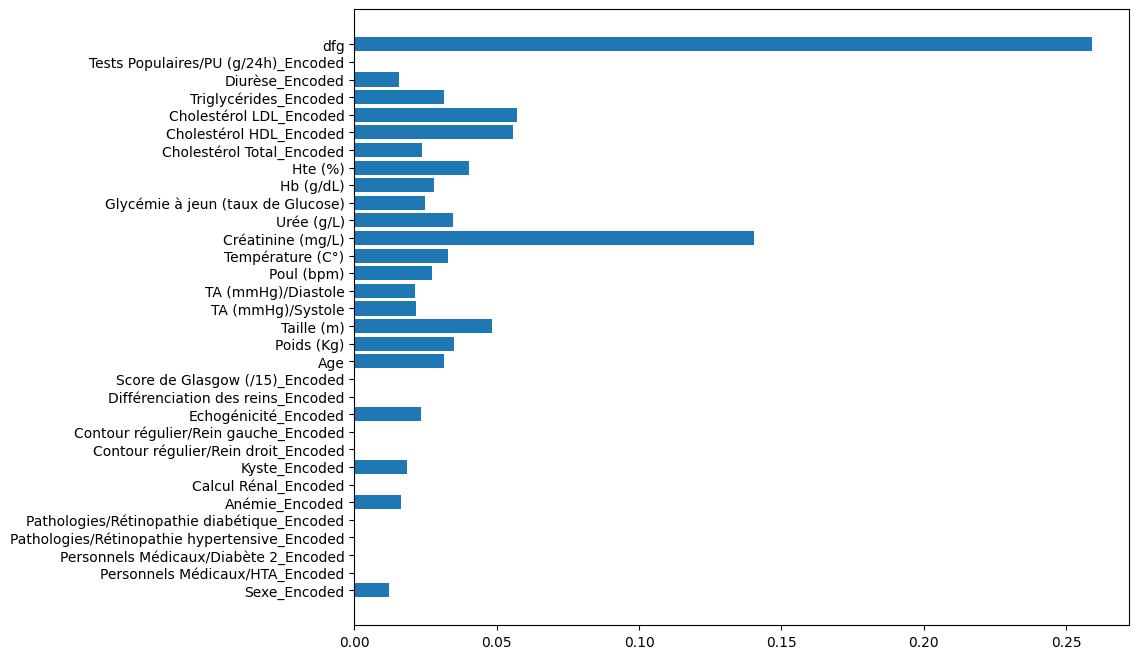

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.barh(X.columns, xgb.feature_importances_)
plt.show()


In [165]:
import xgboost
print(xgboost.__version__)


3.1.3


In [166]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="mlogloss",
    early_stopping_rounds=20   # ✅ ici maintenant
)

xgb.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

print("Best iteration:", xgb.best_iteration)


Best iteration: 96


📊 Rapport de classification :

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.78      0.70      0.74        10
           2       0.90      0.90      0.90        10
           3       0.73      0.80      0.76        10
           4       0.82      0.90      0.86        10
           5       1.00      0.92      0.96        13

    accuracy                           0.85        62
   macro avg       0.85      0.85      0.85        62
weighted avg       0.86      0.85      0.86        62

📊 Accuracy : 0.8548387096774194


<Figure size 800x600 with 0 Axes>

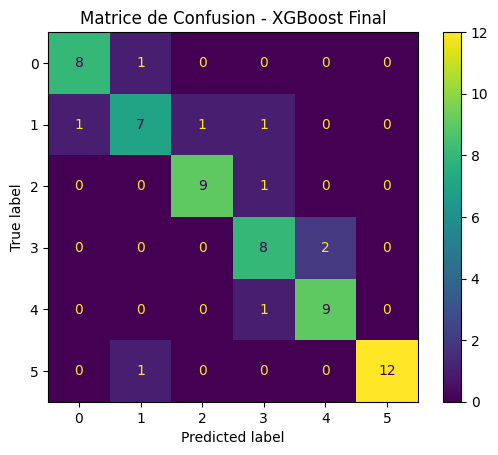

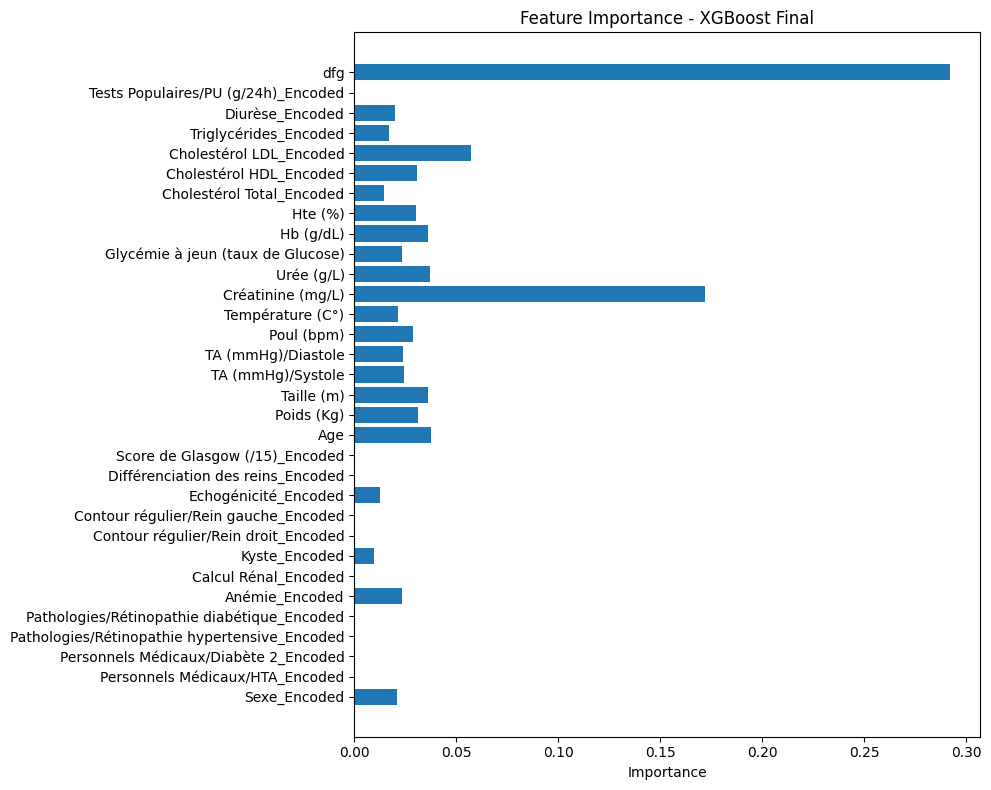

In [168]:
# ==========================================
# 1️⃣ Importations
# ==========================================

import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# ==========================================
# 2️⃣ Séparation Train / Test
# ==========================================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# ==========================================
# 3️⃣ Modèle Final (96 arbres optimaux)
# ==========================================

xgb_final = XGBClassifier(
    n_estimators=96,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="mlogloss"
)

# Entraînement
xgb_final.fit(X_train, y_train)


# ==========================================
# 4️⃣ Prédictions
# ==========================================

y_pred = xgb_final.predict(X_test)


# ==========================================
# 5️⃣ Évaluation
# ==========================================

print("📊 Rapport de classification :\n")
print(classification_report(y_test, y_pred))

print("📊 Accuracy :", np.mean(y_pred == y_test))


# ==========================================
# 6️⃣ Matrice de confusion
# ==========================================

plt.figure(figsize=(8,6))
ConfusionMatrixDisplay.from_estimator(xgb_final, X_test, y_test)
plt.title("Matrice de Confusion - XGBoost Final")
plt.show()


# ==========================================
# 7️⃣ Feature Importance
# ==========================================

plt.figure(figsize=(10,8))
plt.barh(X.columns, xgb_final.feature_importances_)
plt.title("Feature Importance - XGBoost Final")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


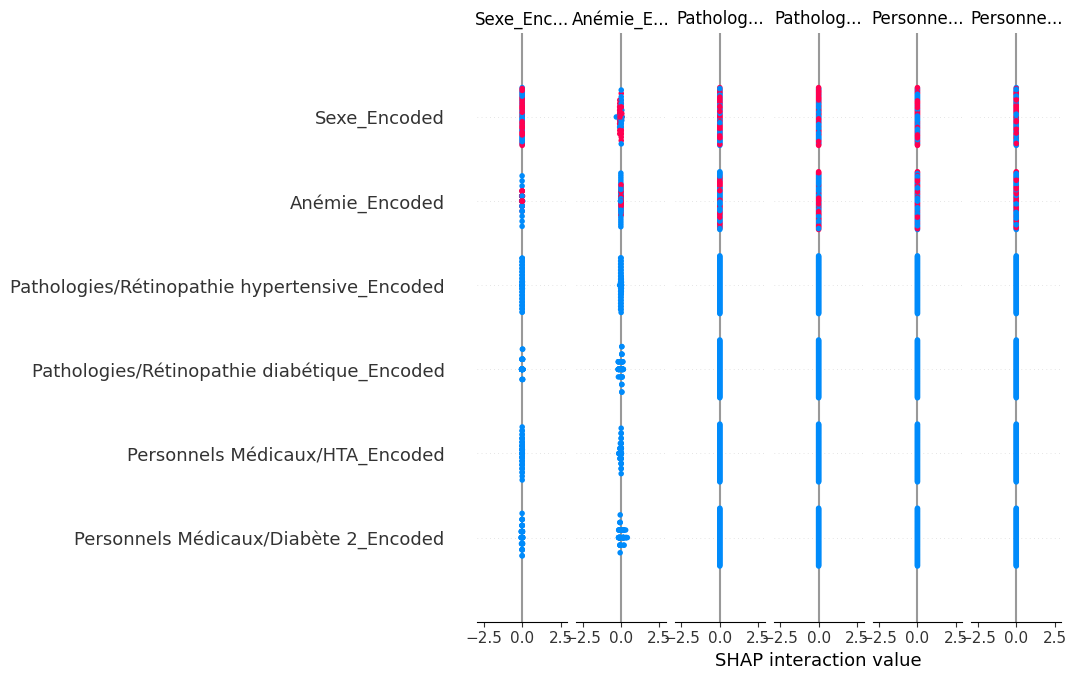

In [173]:
import shap

# Explainer
explainer = shap.TreeExplainer(xgb_final)
shap_values = explainer.shap_values(X_test)

# Plot global importance
shap.summary_plot(shap_values, X_test)


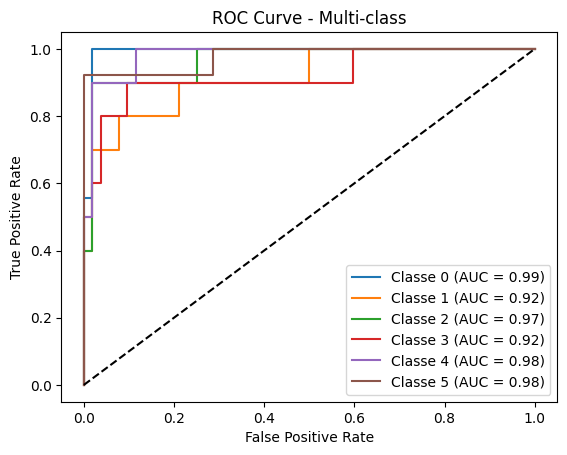

In [174]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_score = xgb_final.predict_proba(X_test)

for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Classe {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Multi-class")
plt.legend()
plt.show()


🔹 Matrice de confusion :
[[ 8  1  0  0  0  0]
 [ 1  7  1  1  0  0]
 [ 0  1  7  2  0  0]
 [ 0  0  0  8  2  0]
 [ 0  0  0  1  9  0]
 [ 0  1  0  0  0 12]]

🔹 Rapport de classification :
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.70      0.70      0.70        10
           2       0.88      0.70      0.78        10
           3       0.67      0.80      0.73        10
           4       0.82      0.90      0.86        10
           5       1.00      0.92      0.96        13

    accuracy                           0.82        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.83      0.82      0.82        62



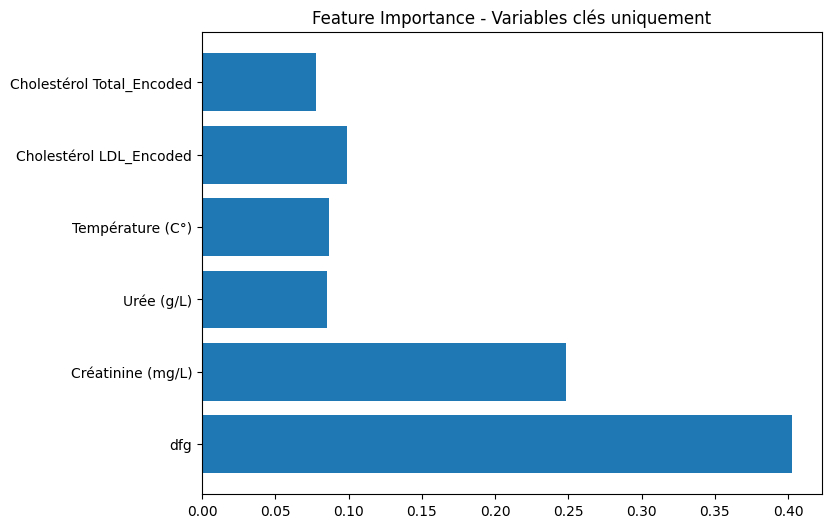

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ✅ Sélection des features importantes
important_features = [
    "dfg",
    "Créatinine (mg/L)",
    "Urée (g/L)",
    "Température (C°)",
    "Cholestérol LDL_Encoded",
    "Cholestérol Total_Encoded"
]

X_imp = df_ml[important_features]
y_imp = df_ml["Stage_de_l_IRC_Encoded"]

# ✅ Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(
    X_imp, y_imp, test_size=0.2, random_state=42, stratify=y_imp
)

# ✅ Entraînement XGBoost
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

# ✅ Prédiction et évaluation
y_pred = xgb.predict(X_test)

print("🔹 Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

print("\n🔹 Rapport de classification :")
print(classification_report(y_test, y_pred))

# ✅ Feature importance pour ces 6 variables
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(important_features, xgb.feature_importances_)
plt.title("Feature Importance - Variables clés uniquement")
plt.show()


In [ ]:
import pickle


In [ ]:
from xgboost import XGBClassifier
import pickle
import pandas as pd

# 🔹 1️⃣ Tes 6 features importantes
important_features = [
    "dfg",
    "Créatinine (mg/L)",
    "Urée (g/L)",
    "Température (C°)",
    "Cholestérol LDL_Encoded",
    "Cholestérol Total_Encoded"
]

X_imp = df_ml[important_features]  # DataFrame des features
y_imp = df_ml["Stage_de_l_IRC_Encoded"]  # Cible

# 🔹 2️⃣ Créer le modèle XGBoost avec les mêmes hyperparamètres
xgb_imp = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# 🔹 3️⃣ Entraîner le modèle
xgb_imp.fit(X_imp, y_imp)

# 🔹 4️⃣ Sauvegarder le modèle strictement sur ces 6 features
filename = "xgb_model_6features.pkl"
with open(filename, "wb") as file:
    pickle.dump(xgb_imp, file)

print(f"✅ Modèle enregistré dans {filename} avec les 6 features")


✅ Modèle enregistré dans xgb_model_6features.pkl avec les 6 features


In [ ]:
# Charger le modèle
with open("xgb_model_6features.pkl", "rb") as file:
    xgb_loaded = pickle.load(file)

# Créer un DataFrame de test avec exactement les 6 features
X_test_new = pd.DataFrame([
    [60, 1.2, 0.5, 36.5, 1, 2],
    [45, 1.8, 0.7, 37.0, 2, 3],
    [70, 1.0, 0.4, 36.8, 1, 2]
], columns=important_features)

# Faire la prédiction
y_pred_new = xgb_loaded.predict(X_test_new)
print("✅ Prédictions :")
print(y_pred_new)


✅ Prédictions :
[5 5 5]


In [ ]:
y_pred_new = [5, 5, 5]  # ✅ correct
print(y_pred_new)



[5, 5, 5]


In [ ]:
from google.colab import files

# 🔹 Télécharger le fichier vers ton PC
files.download("xgb_model_6features.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>